In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('Solarize_Light2')

%matplotlib inline

In [130]:
# загрузим данные
df = pd.read_csv('C:/Users/Александр/pj/pet_projects/Cancer/cancer-death-rates-by-type.csv')
df.head()

,Entity,Code,Year,Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate),...,Deaths - Pancreatic cancer - Sex: Both - Age: Age-standardized (Rate),"Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)",Deaths - Lip and oral cavity cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Colon and rectum cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Liver cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Larynx cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Ovarian cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Thyroid cancer - Sex: Both - Age: Age-standardized (Rate),Deaths - Brain and central nervous system cancer - Sex: Both - Age: Age-standardized (Rate)
0,Afghanistan,AFG,1990,6.486764,7.310613,0.837238,4.285153,4.479875,0.826029,31.988172,...,1.995093,14.069657,1.273888,7.874312,2.611981,11.971836,3.621251,1.045087,0.795176,4.512770
1,Afghanistan,AFG,1991,6.466813,7.288994,0.829514,4.233850,4.468688,0.804741,31.853999,...,1.951962,13.805590,1.257040,7.754987,2.590045,11.900918,3.589414,1.035561,0.789659,4.446988
2,Afghanistan,AFG,1992,6.466158,7.299131,0.821847,4.192670,4.465265,0.785397,31.785219,...,1.906444,13.591141,1.244526,7.652136,2.573065,11.841933,3.570433,1.025213,0.784548,4.413799
3,Afghanistan,AFG,1993,6.479348,7.381653,0.822471,4.166575,4.518657,0.777856,32.059246,...,1.888143,13.422799,1.240243,7.555002,2.578325,11.865807,3.593340,1.023647,0.788610,4.440347
4,Afghanistan,AFG,1994,6.477914,7.473144,0.827221,4.140383,4.600542,0.772456,32.504461,...,1.876670,13.250556,1.236967,7.429222,2.593368,11.919348,3.632985,1.027381,0.796990,4.471324


In [131]:
# посмотрим что содержится в датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 25 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Entity                                                                                       6840 non-null   object 
 1   Code                                                                                         6150 non-null   object 
 2   Year                                                                                         6840 non-null   int64  
 3   Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate)                          6840 non-null   float64
 4   Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate)                            6840 non-null   float64
 5   Deaths - Uterine cancer - Sex: Bot

In [132]:
# многие столбцы слишком громоздкие, поэтому необходимо их переименовать
df = df.rename({'Deaths - Prostate cancer - Sex: Both - Age: Age-standardized (Rate)': 'Prostate cancer',
               'Deaths - Breast cancer - Sex: Both - Age: Age-standardized (Rate)': 'Breast cancer',
               'Deaths - Uterine cancer - Sex: Both - Age: Age-standardized (Rate)': 'Uterine cancer',
               'Deaths - Bladder cancer - Sex: Both - Age: Age-standardized (Rate)': 'Bladder cancer',
               'Deaths - Cervical cancer - Sex: Both - Age: Age-standardized (Rate)': 'Cervical cancer',
               'Deaths - Kidney cancer - Sex: Both - Age: Age-standardized (Rate)': 'Kidney cancer',
               'Deaths - Stomach cancer - Sex: Both - Age: Age-standardized (Rate)': 'Stomach cancer',
               'Deaths - Nasopharynx cancer - Sex: Both - Age: Age-standardized (Rate)': 'Nasopharynx cancer',
               'Deaths - Testicular cancer - Sex: Both - Age: Age-standardized (Rate)': 'Testicular cancer',
               'Deaths - Other pharynx cancer - Sex: Both - Age: Age-standardized (Rate)': 'Other pharynx cancer',
               'Deaths - Esophageal cancer - Sex: Both - Age: Age-standardized (Rate)': 'Esophageal cancer',
               'Deaths - Non-melanoma skin cancer - Sex: Both - Age: Age-standardized (Rate)': 'Non-melanoma skin cancer',
               'Deaths - Pancreatic cancer - Sex: Both - Age: Age-standardized (Rate)': 'Pancreatic cancer',
               'Deaths - Tracheal, bronchus, and lung cancer - Sex: Both - Age: Age-standardized (Rate)': 'Lung cancer',
               'Deaths - Lip and oral cavity cancer - Sex: Both - Age: Age-standardized (Rate)': 'Lip and oral cavity cancer',
               'Deaths - Colon and rectum cancer - Sex: Both - Age: Age-standardized (Rate)': 'Colon and rectum cancer',
               'Deaths - Gallbladder and biliary tract cancer - Sex: Both - Age: Age-standardized (Rate)': 'Gallbladder cancer',
               'Deaths - Liver cancer - Sex: Both - Age: Age-standardized (Rate)': 'Liver cancer',
               'Deaths - Larynx cancer - Sex: Both - Age: Age-standardized (Rate)': 'Larynx cancer',
               'Deaths - Ovarian cancer - Sex: Both - Age: Age-standardized (Rate)': 'Ovarian cancer',
               'Deaths - Thyroid cancer - Sex: Both - Age: Age-standardized (Rate)': 'Thyroid cancer',
               'Deaths - Brain and central nervous system cancer - Sex: Both - Age: Age-standardized (Rate)': 'Brain cancer'}, 
                axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      6840 non-null   object 
 1   Code                        6150 non-null   object 
 2   Year                        6840 non-null   int64  
 3   Prostate cancer             6840 non-null   float64
 4   Breast cancer               6840 non-null   float64
 5   Uterine cancer              6840 non-null   float64
 6   Bladder cancer              6840 non-null   float64
 7   Cervical cancer             6840 non-null   float64
 8   Kidney cancer               6840 non-null   float64
 9   Stomach cancer              6840 non-null   float64
 10  Nasopharynx cancer          6840 non-null   float64
 11  Testicular cancer           6840 non-null   float64
 12  Other pharynx cancer        6840 non-null   float64
 13  Esophageal cancer           6840 

In [133]:
# столбец Code не несет никакой полезной информации для нас
df = df.drop('Code', axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      6840 non-null   object 
 1   Year                        6840 non-null   int64  
 2   Prostate cancer             6840 non-null   float64
 3   Breast cancer               6840 non-null   float64
 4   Uterine cancer              6840 non-null   float64
 5   Bladder cancer              6840 non-null   float64
 6   Cervical cancer             6840 non-null   float64
 7   Kidney cancer               6840 non-null   float64
 8   Stomach cancer              6840 non-null   float64
 9   Nasopharynx cancer          6840 non-null   float64
 10  Testicular cancer           6840 non-null   float64
 11  Other pharynx cancer        6840 non-null   float64
 12  Esophageal cancer           6840 non-null   float64
 13  Non-melanoma skin cancer    6840 

In [134]:
# столбец Code удален, остальные успешно переименованы
df.head()

,Entity,Year,Prostate cancer,Breast cancer,Uterine cancer,Bladder cancer,Cervical cancer,Kidney cancer,Stomach cancer,Nasopharynx cancer,...,Pancreatic cancer,Lung cancer,Lip and oral cavity cancer,Colon and rectum cancer,Gallbladder cancer,Liver cancer,Larynx cancer,Ovarian cancer,Thyroid cancer,Brain cancer
0,Afghanistan,1990,6.486764,7.310613,0.837238,4.285153,4.479875,0.826029,31.988172,0.852917,...,1.995093,14.069657,1.273888,7.874312,2.611981,11.971836,3.621251,1.045087,0.795176,4.512770
1,Afghanistan,1991,6.466813,7.288994,0.829514,4.233850,4.468688,0.804741,31.853999,0.844138,...,1.951962,13.805590,1.257040,7.754987,2.590045,11.900918,3.589414,1.035561,0.789659,4.446988
2,Afghanistan,1992,6.466158,7.299131,0.821847,4.192670,4.465265,0.785397,31.785219,0.837496,...,1.906444,13.591141,1.244526,7.652136,2.573065,11.841933,3.570433,1.025213,0.784548,4.413799
3,Afghanistan,1993,6.479348,7.381653,0.822471,4.166575,4.518657,0.777856,32.059246,0.838997,...,1.888143,13.422799,1.240243,7.555002,2.578325,11.865807,3.593340,1.023647,0.788610,4.440347
4,Afghanistan,1994,6.477914,7.473144,0.827221,4.140383,4.600542,0.772456,32.504461,0.843108,...,1.876670,13.250556,1.236967,7.429222,2.593368,11.919348,3.632985,1.027381,0.796990,4.471324


In [135]:
# посмотрим на максимальные значения в датасете
print(df.max())

Entity                          Zimbabwe
Year                                2019
Prostate cancer                54.152931
Breast cancer                  39.243064
Uterine cancer                  6.626412
Bladder cancer                  12.24019
Cervical cancer                46.158034
Kidney cancer                   7.998508
Stomach cancer                 75.409475
Nasopharynx cancer              9.633689
Testicular cancer               7.274967
Other pharynx cancer             5.82458
Esophageal cancer              33.487436
Non-melanoma skin cancer        2.594993
Pancreatic cancer               21.36477
Lung cancer                   106.273528
Lip and oral cavity cancer     15.480097
Colon and rectum cancer        38.514601
Gallbladder cancer             18.759678
Liver cancer                  130.675113
Larynx cancer                   7.169254
Ovarian cancer                  8.097769
Thyroid cancer                  3.282715
Brain cancer                    8.591544
dtype: object


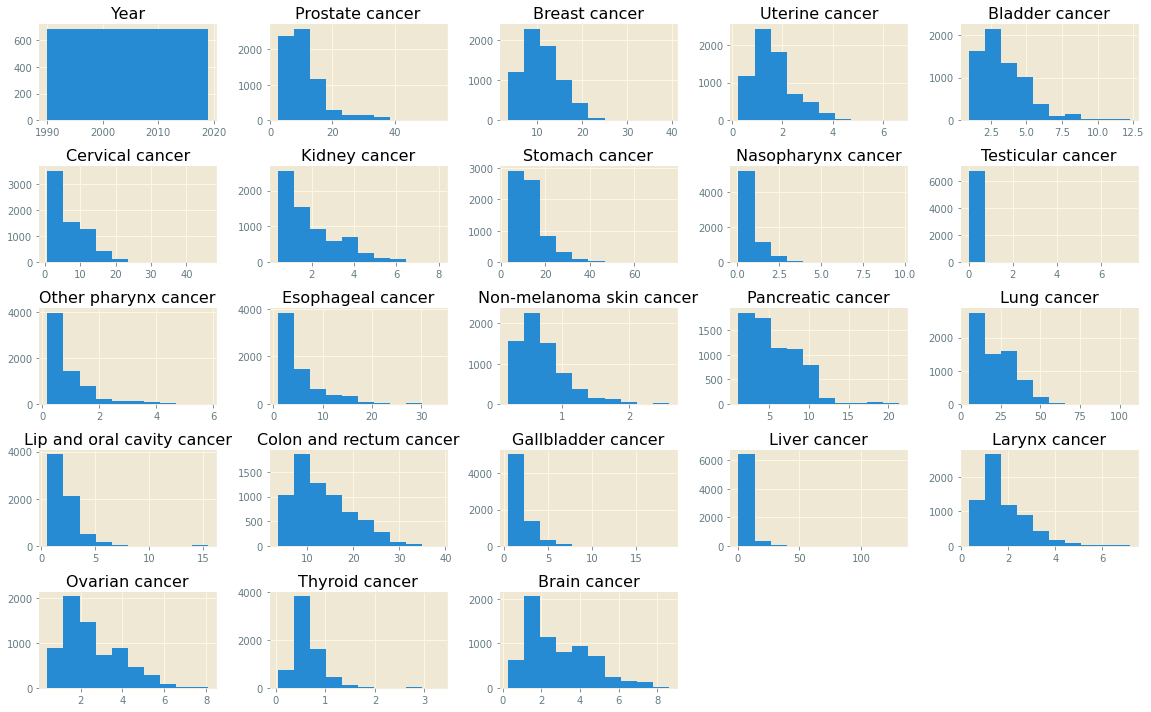

In [136]:
# построим первые графики чтобы визуально ознакомиться с данными
df.hist(bins=10, figsize=(16, 10))
plt.tight_layout()

# DEATH CANCER CAUSES IN THE WORLD

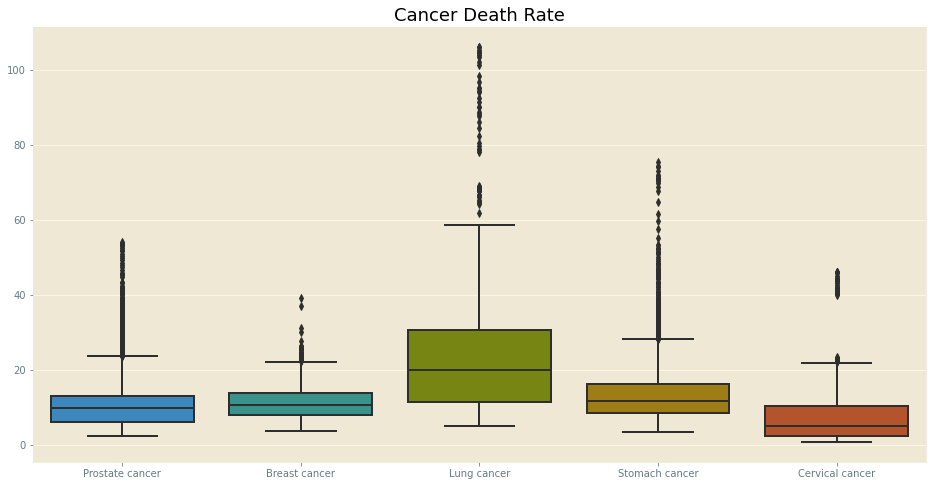

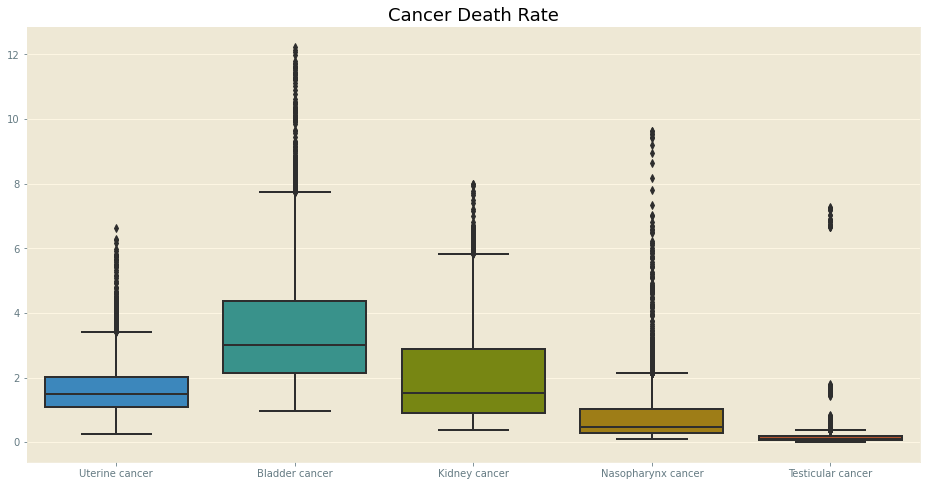

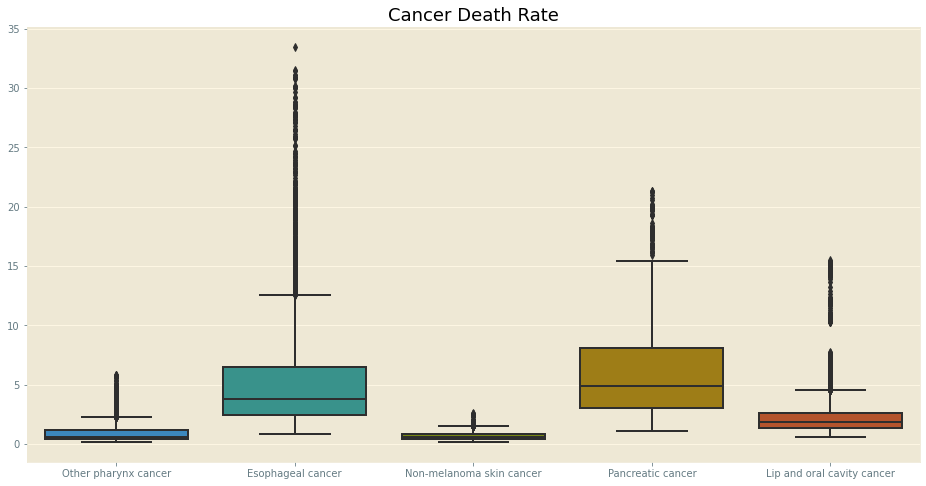

In [142]:
# посмотрим на распределение числовых переменных
plt.figure(figsize=(16,8))
sns.boxplot(data=df.loc[:, ['Prostate cancer', 'Breast cancer', 'Lung cancer', 'Stomach cancer', 'Cervical cancer']])
plt.title('Cancer Death Rate', size = 18)
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df.loc[:, ['Uterine cancer', 'Bladder cancer', 'Kidney cancer', 'Nasopharynx cancer', 'Testicular cancer']])
plt.title('Cancer Death Rate', size = 18)
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df.loc[:, ['Other pharynx cancer', 'Esophageal cancer', 'Non-melanoma skin cancer', 'Pancreatic cancer', 'Lip and oral cavity cancer']])
plt.title('Cancer Death Rate', size = 18)
plt.show()

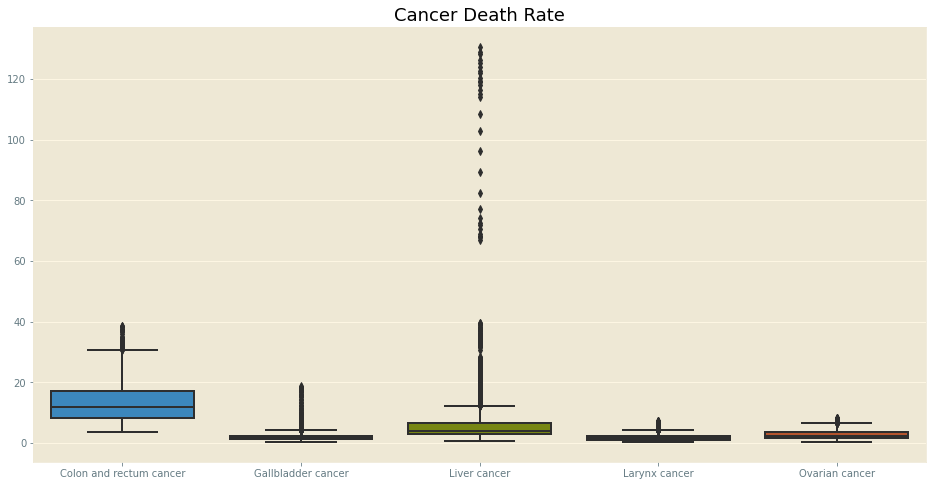

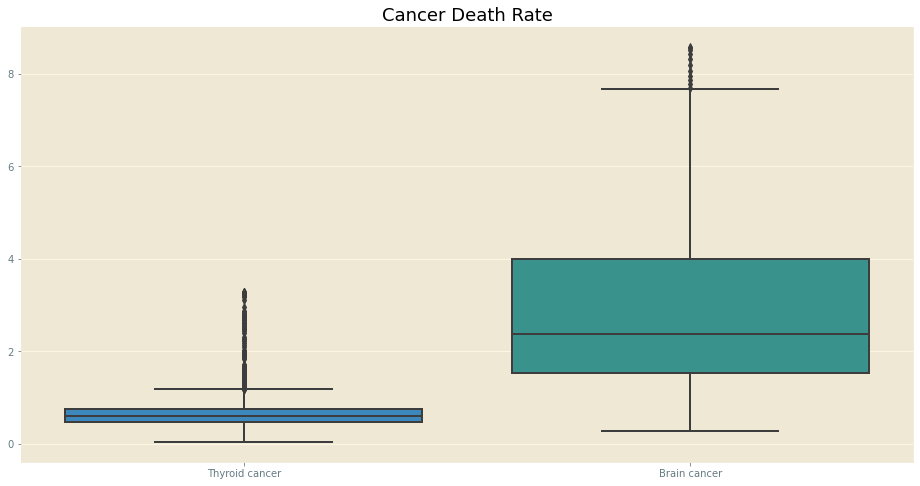

In [144]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df.loc[:, ['Colon and rectum cancer', 'Gallbladder cancer', 'Liver cancer', 'Larynx cancer', 'Ovarian cancer']])
plt.title('Cancer Death Rate', size = 18)
plt.show()

plt.figure(figsize=(16,8))
sns.boxplot(data=df.loc[:, ['Thyroid cancer', 'Brain cancer']])
plt.title('Cancer Death Rate', size = 18)
plt.show()

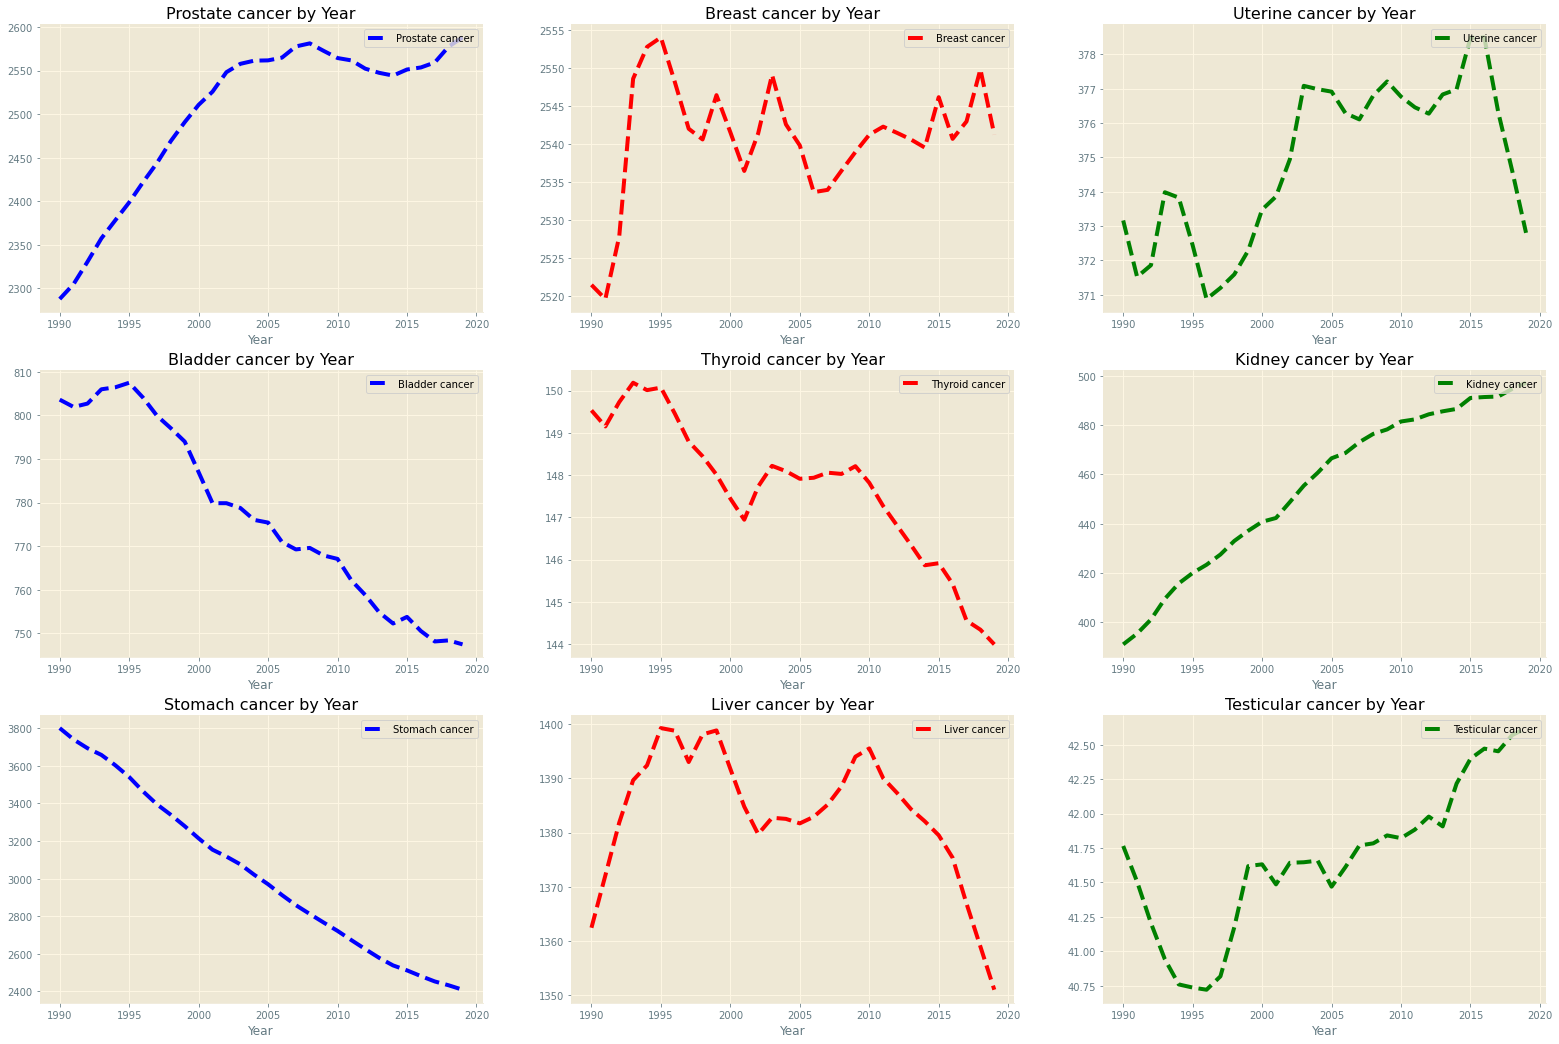

In [145]:
# посмотрим на отношение случаев к году
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(3,3,1)
sub1.set_xlabel('Year')
sub1.set_title('Prostate cancer by Year')
df.groupby('Year').sum()['Prostate cancer'].plot(linewidth=4,color='blue', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,2)
sub1.set_xlabel('Year')
sub1.set_title('Breast cancer by Year')
df.groupby('Year').sum()['Breast cancer'].plot(linewidth=4, color='red', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,3)
sub1.set_xlabel('Year')
sub1.set_title('Uterine cancer by Year')
df.groupby('Year').sum()['Uterine cancer'].plot(linewidth=4, color = 'green', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,4)
sub1.set_xlabel('Year')
sub1.set_title('Bladder cancer by Year')
df.groupby('Year').sum()['Bladder cancer'].plot(linewidth=4, color = 'blue', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,5)
sub1.set_xlabel('Year')
sub1.set_title('Thyroid cancer by Year')
df.groupby('Year').sum()['Thyroid cancer'].plot(linewidth=4, color = 'red', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,6)
sub1.set_xlabel('Year')
sub1.set_title('Kidney cancer by Year')
df.groupby('Year').sum()['Kidney cancer'].plot(linewidth=4, color = 'green', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,7)
sub1.set_xlabel('Year')
sub1.set_title('Stomach cancer by Year')
df.groupby('Year').sum()['Stomach cancer'].plot(linewidth=4, color = 'blue', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,8)
sub1.set_xlabel('Year')
sub1.set_title('Liver cancer by Year')
df.groupby('Year').sum()['Liver cancer'].plot(linewidth=4, color = 'red', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,9)
sub1.set_xlabel('Year')
sub1.set_title('Testicular cancer by Year')
df.groupby('Year').sum()['Testicular cancer'].plot(linewidth=4, color = 'green', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)
sns.despine()

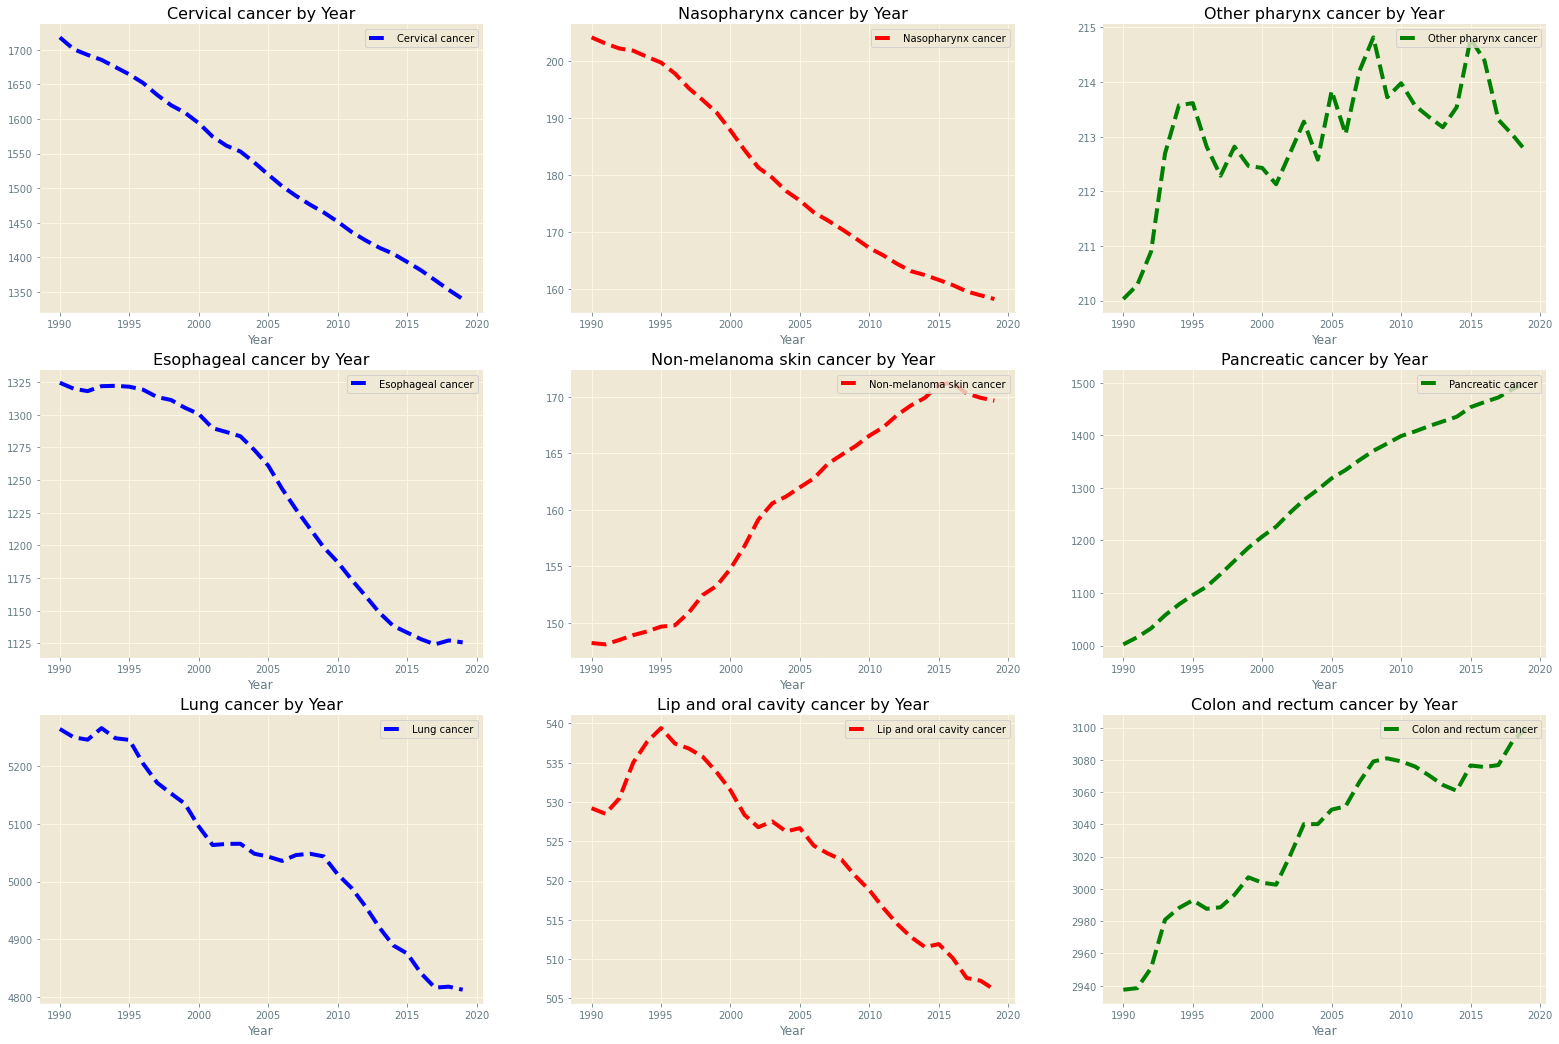

In [146]:
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(3,3,1)
sub1.set_xlabel('Year')
sub1.set_title('Cervical cancer by Year')
df.groupby('Year').sum()['Cervical cancer'].plot(linewidth=4,color='blue', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,2)
sub1.set_xlabel('Year')
sub1.set_title('Nasopharynx cancer by Year')
df.groupby('Year').sum()['Nasopharynx cancer'].plot(linewidth=4, color='red', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,3)
sub1.set_xlabel('Year')
sub1.set_title('Other pharynx cancer by Year')
df.groupby('Year').sum()['Other pharynx cancer'].plot(linewidth=4, color = 'green', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,4)
sub1.set_xlabel('Year')
sub1.set_title('Esophageal cancer by Year')
df.groupby('Year').sum()['Esophageal cancer'].plot(linewidth=4, color = 'blue', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,5)
sub1.set_xlabel('Year')
sub1.set_title('Non-melanoma skin cancer by Year')
df.groupby('Year').sum()['Non-melanoma skin cancer'].plot(linewidth=4, color = 'red', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,6)
sub1.set_xlabel('Year')
sub1.set_title('Pancreatic cancer by Year')
df.groupby('Year').sum()['Pancreatic cancer'].plot(linewidth=4, color = 'green', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,7)
sub1.set_xlabel('Year')
sub1.set_title('Lung cancer by Year')
df.groupby('Year').sum()['Lung cancer'].plot(linewidth=4, color = 'blue', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,8)
sub1.set_xlabel('Year')
sub1.set_title('Lip and oral cavity cancer by Year')
df.groupby('Year').sum()['Lip and oral cavity cancer'].plot(linewidth=4, color = 'red', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,9)
sub1.set_xlabel('Year')
sub1.set_title('Colon and rectum cancer by Year')
df.groupby('Year').sum()['Colon and rectum cancer'].plot(linewidth=4, color = 'green', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sns.despine()

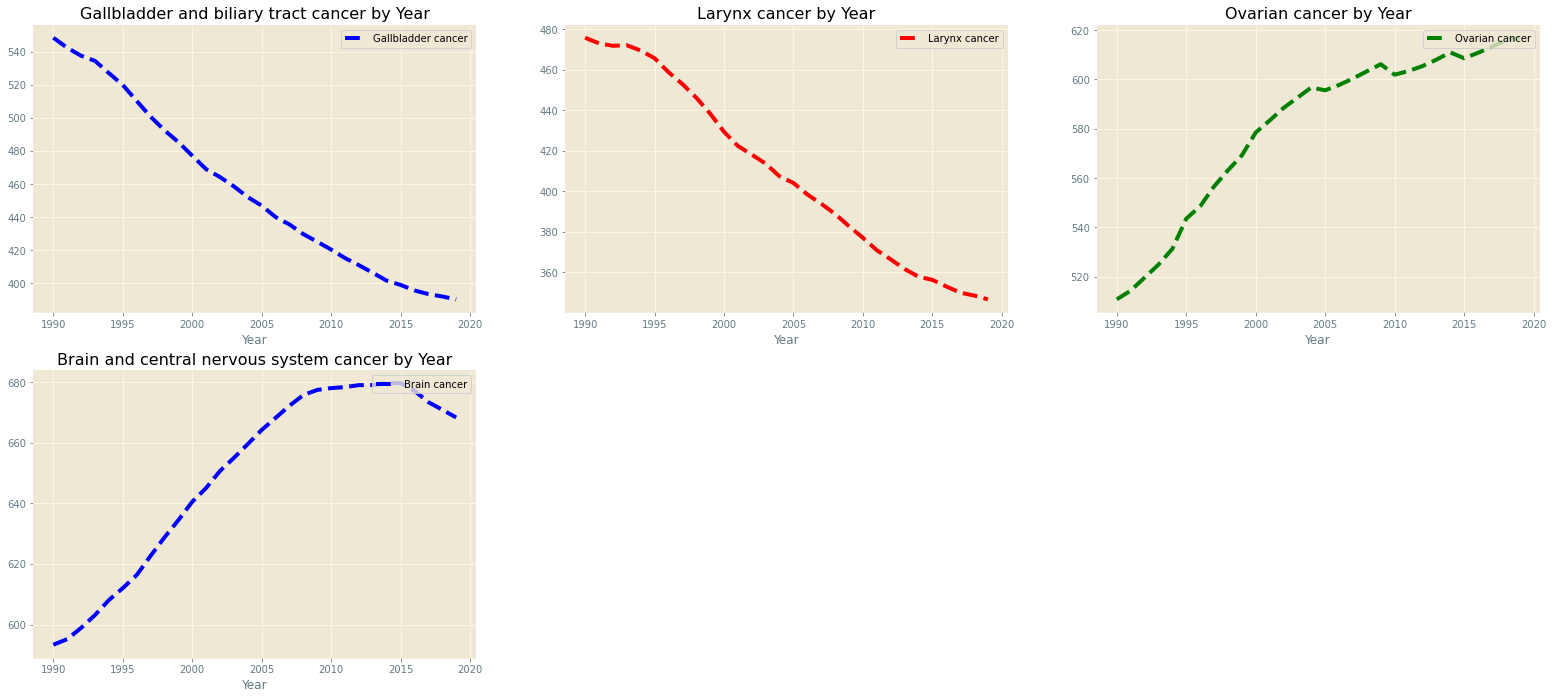

In [150]:
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(3,3,1)
sub1.set_xlabel('Year')
sub1.set_title('Gallbladder and biliary tract cancer by Year')
df.groupby('Year').sum()['Gallbladder cancer'].plot(linewidth=4,color='blue', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,2)
sub1.set_xlabel('Year')
sub1.set_title('Larynx cancer by Year')
df.groupby('Year').sum()['Larynx cancer'].plot(linewidth=4, color='red', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,3)
sub1.set_xlabel('Year')
sub1.set_title('Ovarian cancer by Year')
df.groupby('Year').sum()['Ovarian cancer'].plot(linewidth=4, color = 'green', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,4)
sub1.set_xlabel('Year')
sub1.set_title('Brain and central nervous system cancer by Year')
df.groupby('Year').sum()['Brain cancer'].plot(linewidth=4, color = 'blue', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sns.despine()

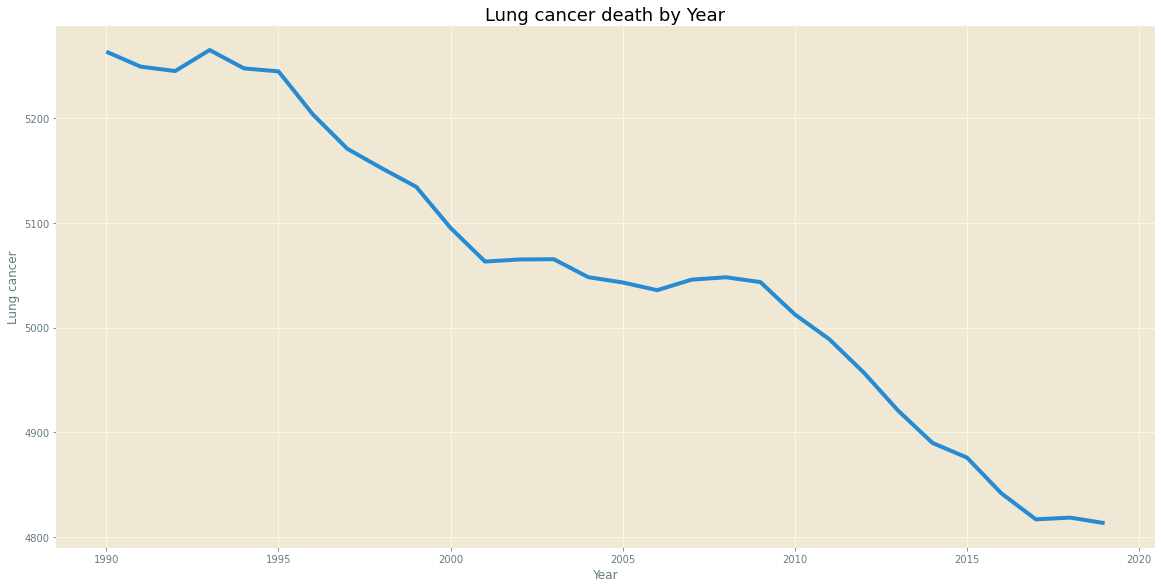

In [151]:
# сделаем примерный график, по типу которого будем строить визуал для остальных болезней
plt.figure(figsize=(16,8))
df.groupby('Year').sum()['Lung cancer'].plot(linewidth=4)
plt.tight_layout()
plt.title('Lung cancer death by Year', size = 18)
plt.ylabel("Lung cancer")
plt.xlabel("Year")
sns.despine()

In [152]:
# выберем рандомно 5 болезней и проверим в каких странах большей всего смертей
# сгруппируем по Entity и возьмем топ 10 стран
Kidney_Top = df.groupby('Entity').sum()['Kidney cancer'].nlargest(10)
Kidney_Top = pd.DataFrame(Kidney_Top)
Prostate_Top = df.groupby('Entity').sum()['Prostate cancer'].nlargest(10)
Prostate_Top = pd.DataFrame(Prostate_Top)
Stomach_Top = df.groupby('Entity').sum()['Stomach cancer'].nlargest(10)
Stomach_Top = pd.DataFrame(Stomach_Top)
Liver_Top = df.groupby('Entity').sum()['Liver cancer'].nlargest(10)
Liver_Top = pd.DataFrame(Liver_Top)
Lung_Top = df.groupby('Entity').sum()['Lung cancer'].nlargest(10)
Lung_Top = pd.DataFrame(Lung_Top)

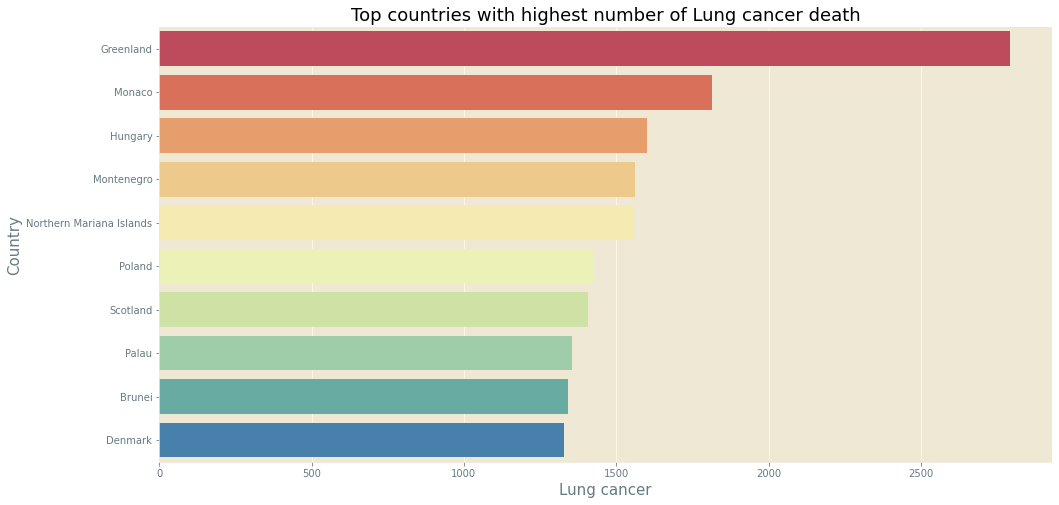

In [154]:
# применим сгруппированные выше данные для построения барплота
# мы видим, что смерти от рака легких чаще встречаются в Гринландии
plt.figure(figsize=(16,8))
sns.barplot(x=Lung_Top['Lung cancer'],y=Lung_Top.index,data=Lung_Top,palette='Spectral')
plt.title('Top countries with highest number of Lung cancer death',fontsize=18, color = 'black')
plt.ylabel('Country',fontsize=15)
plt.xlabel('Lung cancer',fontsize=15)
sns.despine()

## На первом месте по смертям от рака желудка находится Монголия. А судя по лайнплоту из года в год смерти от рака желудка снижаются во всем мире.

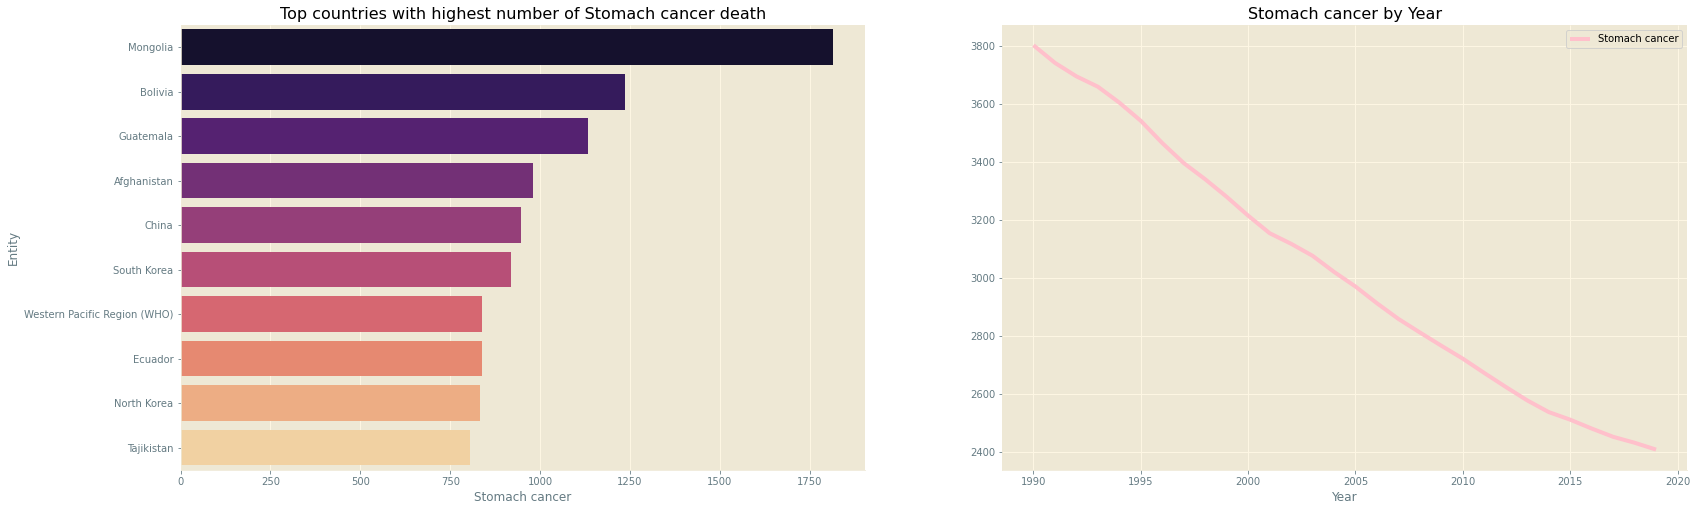

In [155]:
# теперь сопоставим барплот и лайнплот для еще большей наглядности.
# здесь на первом месте Монголия. А судя по лайнплоту из года в год смерти от рака желудка снижаются.
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('Stomach cancer')
sub1.set_title('Top countries with highest number of Stomach cancer death')
sns.barplot(x=Stomach_Top['Stomach cancer'],y=Stomach_Top.index,data=Stomach_Top,palette='magma')

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Stomach cancer by Year')
df.groupby('Year').sum()['Stomach cancer'].plot(linewidth=4, color = 'pink')
plt.legend(bbox_to_anchor=(1, 1), loc=1)
sns.despine()

## Рак почек чаще всего встречается в Чехии. Также, можно увидеть, что с 1990 по 2020 год число смертей от рака почек увеличивается.

## Рак простаты распространен в Доминике (не Доминиканская республика. Оказывается, что есть такая страна на Карибах).

## На лайнплоте можно заметить, что примерно с 2008 года по 2014 шло снижение количества смертей. Но с 2014 по 2020 тренд сменил свое направление.

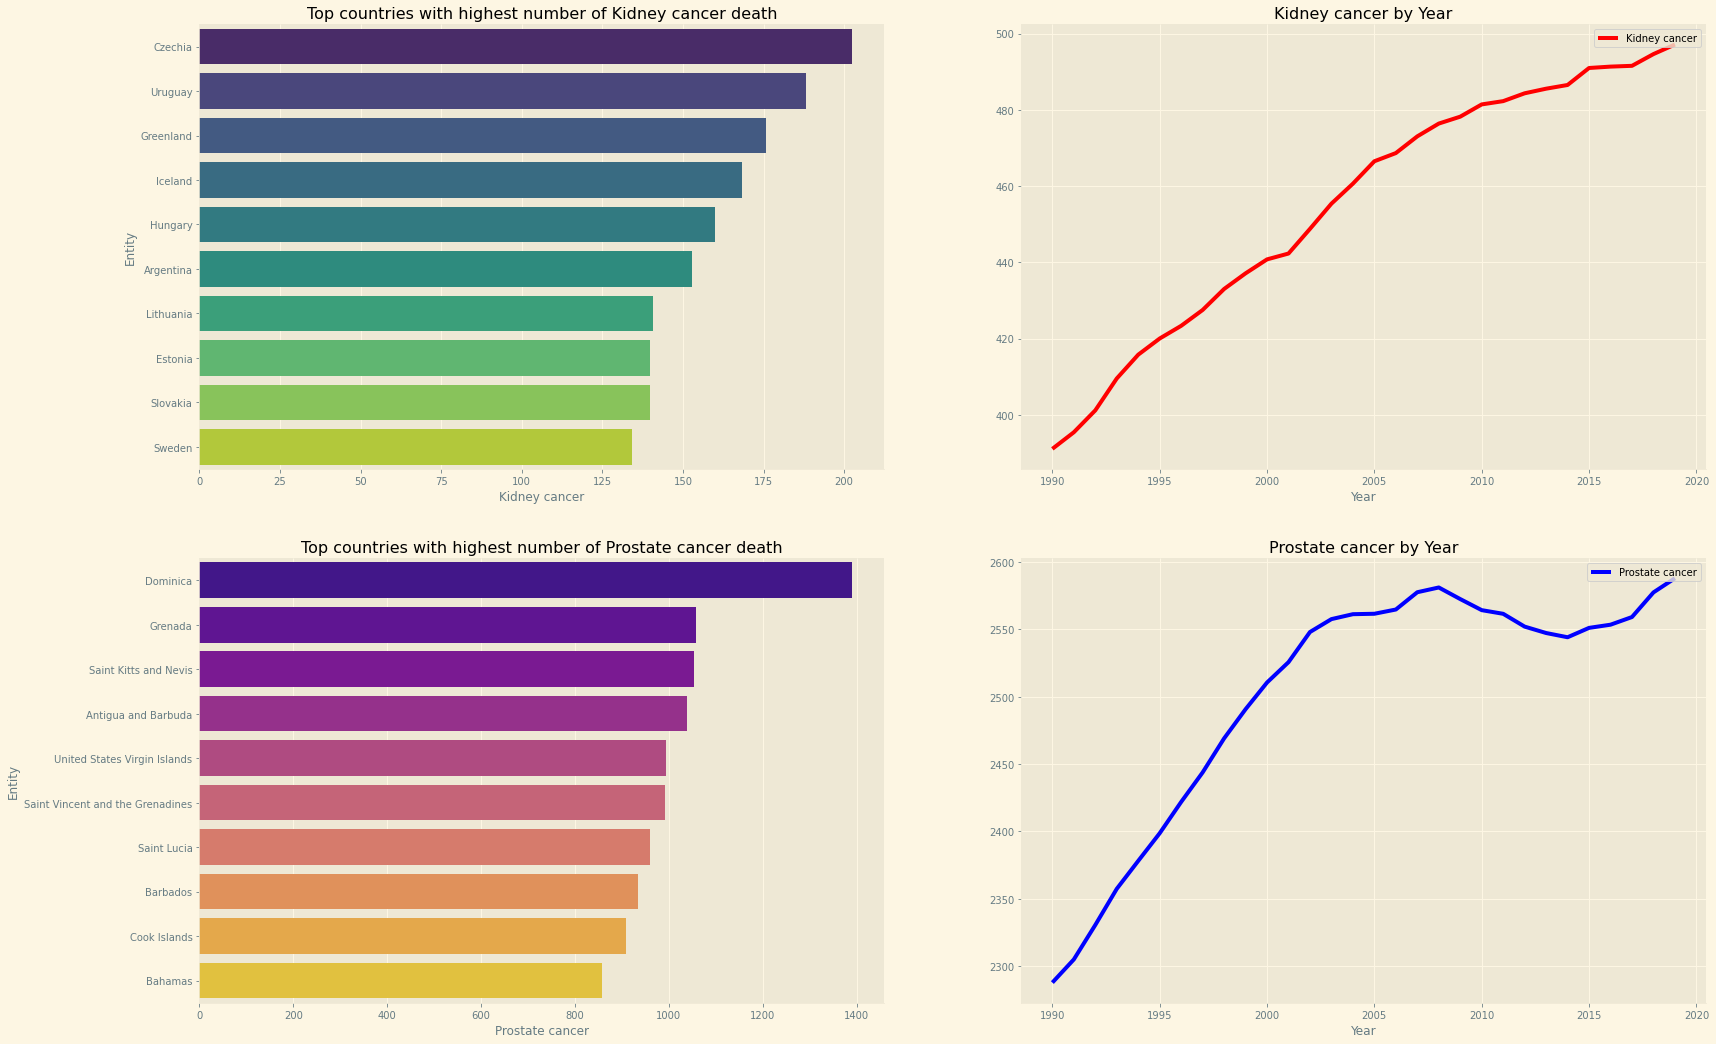

In [48]:
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('Kidney cancer')
sub1.set_title('Top countries with highest number of Kidney cancer death')
sns.barplot(x=Kidney_Top['Kidney cancer'],y=Kidney_Top.index,data=Kidney_Top,palette='viridis')

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Kidney cancer by Year')
df.groupby('Year').sum()['Kidney cancer'].plot(linewidth=4, color = 'red')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(2,2,3)
sub1.set_xlabel('Year')
sub1.set_title('Top countries with highest number of Prostate cancer death')
sns.barplot(x=Prostate_Top['Prostate cancer'],y=Prostate_Top.index,data=Prostate_Top,palette='plasma')

sub1 = fig.add_subplot(2,2,4)
sub1.set_xlabel('None')
sub1.set_title('Prostate cancer by Year')
df.groupby('Year').sum()['Prostate cancer'].plot(linewidth=4,color='blue')
plt.legend(bbox_to_anchor=(1, 1), loc=1)
sns.despine()

## По раку легких лидирует Гринландия, но количество смертей с 1990 по 2020 год значительно снизилось.

## По раку печени Монголия лидирует и практически в 2 раза обходит второе место.

## На лайнплоте видно, что с 1990 по 1999 были высокие показатели смертей, с 1999 по 2005 шло снижение, снова рост с 2005 по 2010, и с 2010 шло снижение до 2020, где показатели достигли минимумов.

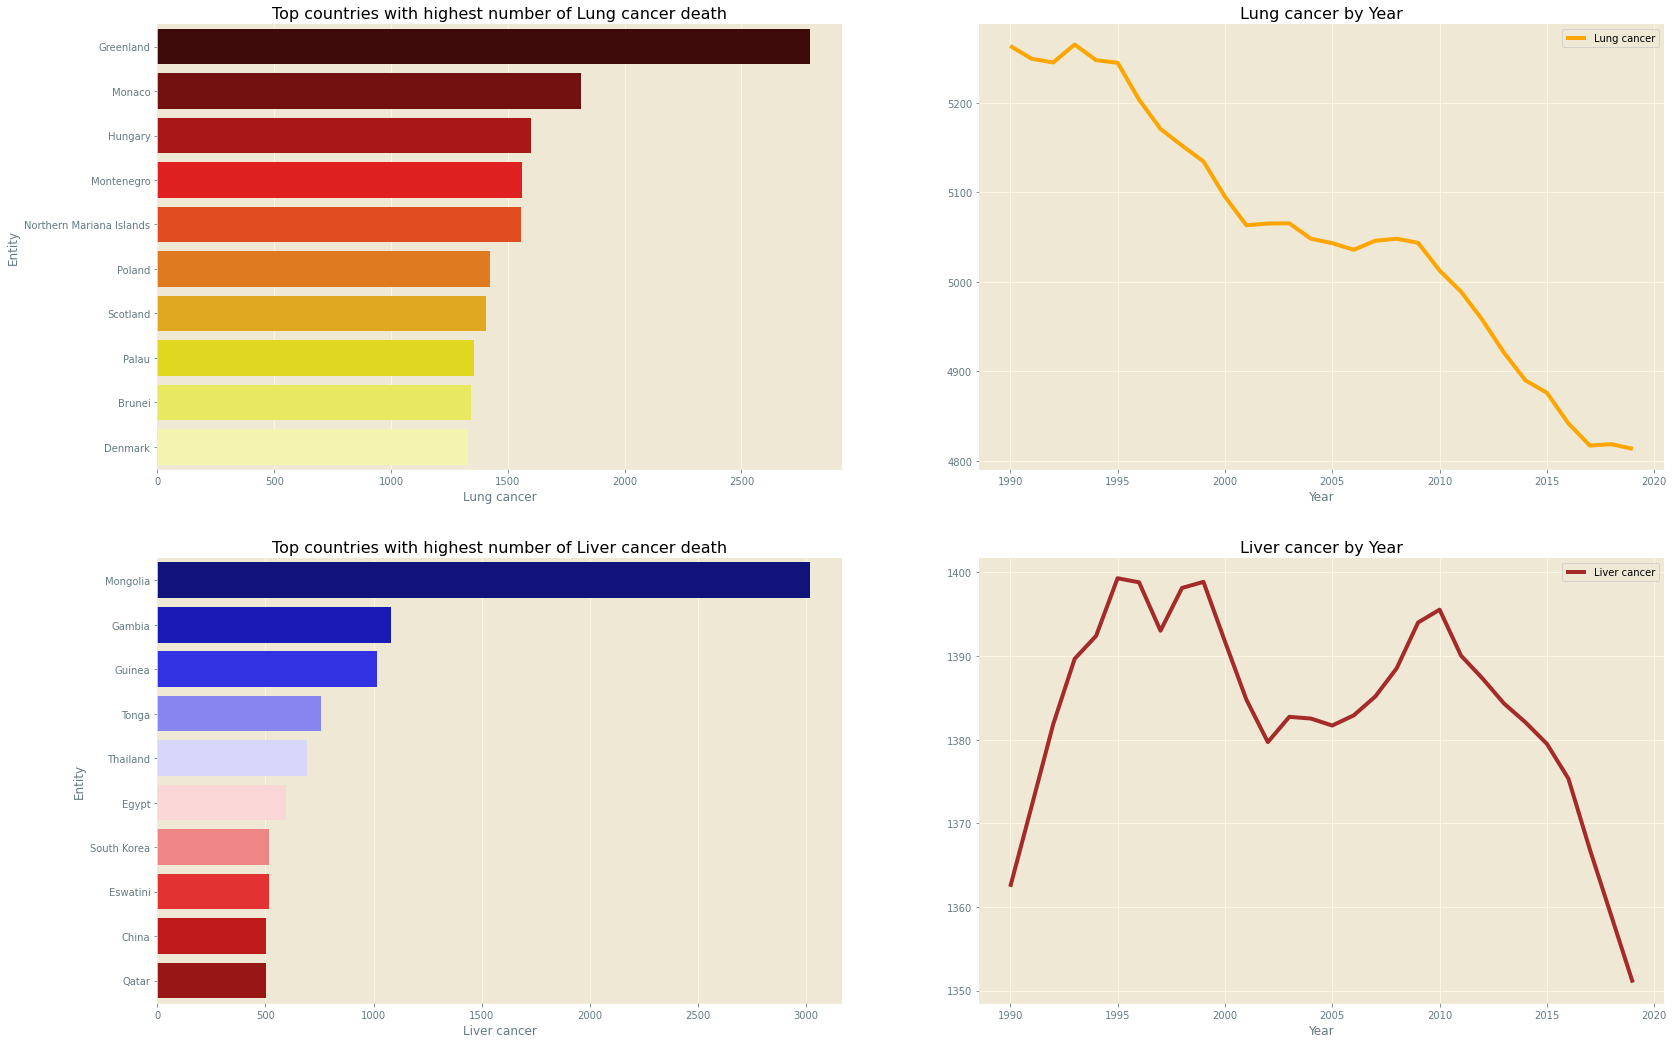

In [156]:
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('Lung cancer')
sub1.set_title('Top countries with highest number of Lung cancer death')
sns.barplot(x=Lung_Top['Lung cancer'],y=Lung_Top.index,data=Lung_Top,palette='hot')

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Lung cancer by Year')
df.groupby('Year').sum()['Lung cancer'].plot(linewidth=4, color = 'orange')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(2,2,3)
sub1.set_xlabel('Year')
sub1.set_title('Top countries with highest number of Liver cancer death')
sns.barplot(x=Liver_Top['Liver cancer'],y=Liver_Top.index,data=Liver_Top,palette='seismic')

sub1 = fig.add_subplot(2,2,4)
sub1.set_xlabel('None')
sub1.set_title('Liver cancer by Year')
df.groupby('Year').sum()['Liver cancer'].plot(linewidth=4,color='brown')
plt.legend(bbox_to_anchor=(1, 1), loc=1)
sns.despine()

# RUSSIA DEATH CANCER CAUSES

### Рассмотрим Россию.

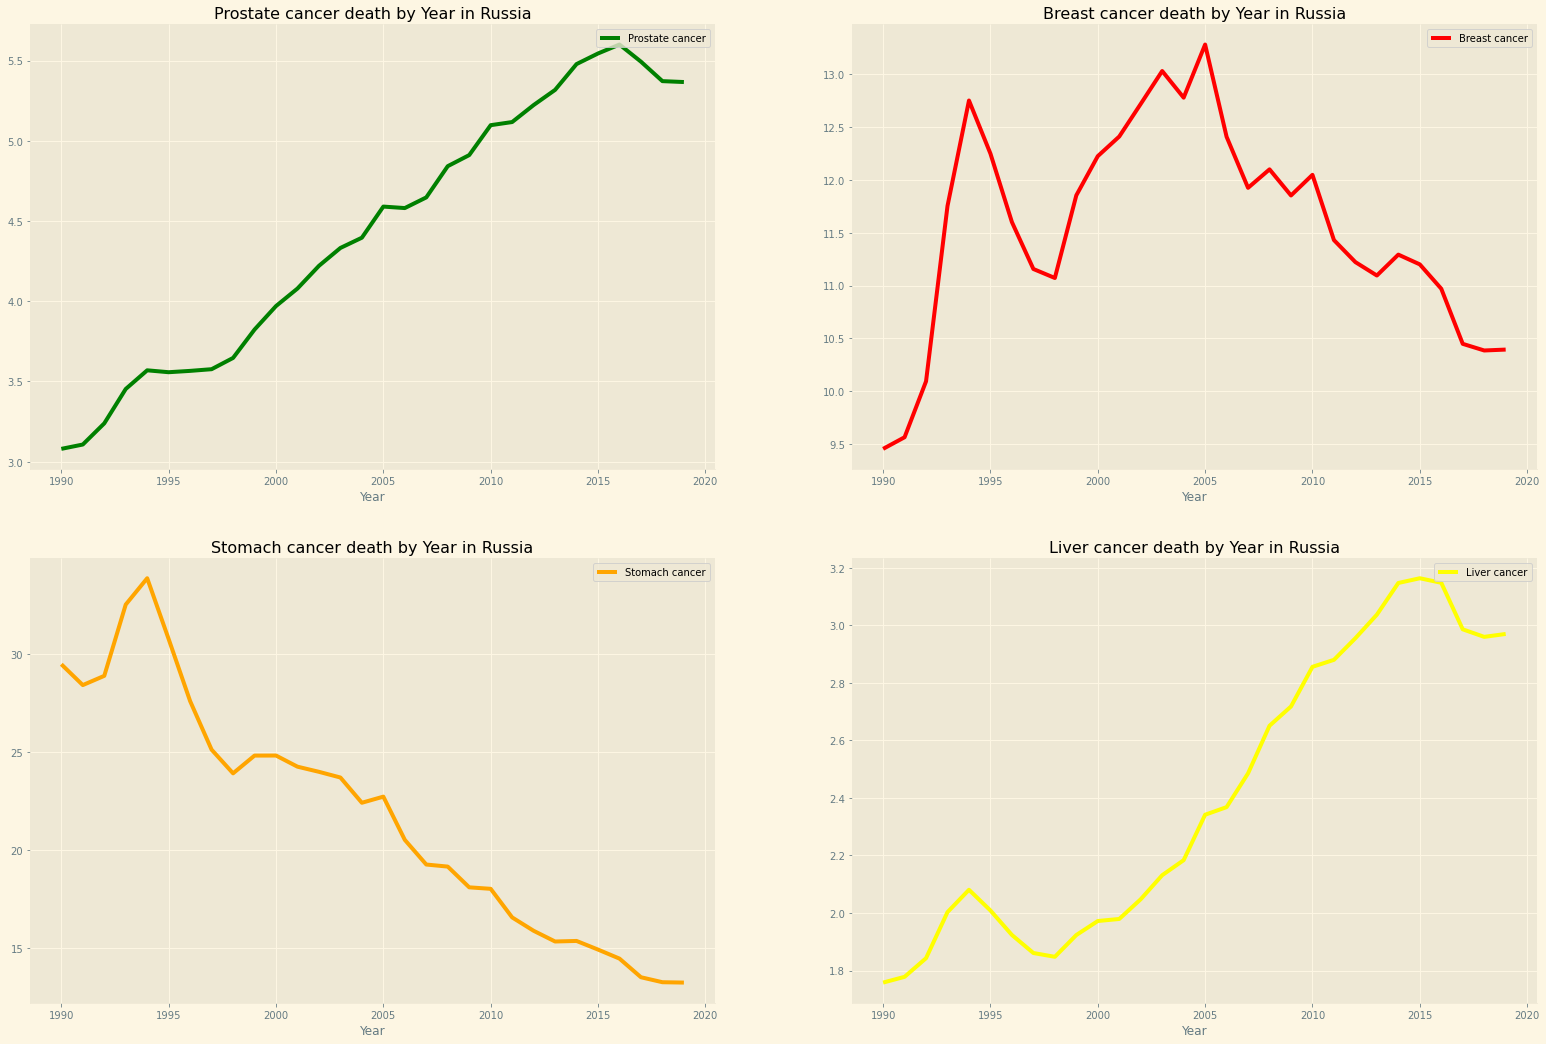

In [66]:
# сгруппируем данные по Entity, где выберем только Россию
russia = df.query(' Entity == "Russia" ')[['Entity', 'Year','Breast cancer','Prostate cancer','Stomach cancer','Liver cancer']]
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('Year')
sub1.set_title('Prostate cancer death by Year in Russia')
russia.groupby('Year').sum()['Prostate cancer'].plot(linewidth=4,color='green')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Breast cancer death by Year in Russia')
russia.groupby('Year').sum()['Breast cancer'].plot(linewidth=4, color='red')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(2,2,3)
sub1.set_xlabel('Year')
sub1.set_title('Stomach cancer death by Year in Russia')
russia.groupby('Year').sum()['Stomach cancer'].plot(linewidth=4, color = 'orange')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(2,2,4)
sub1.set_xlabel('Year')
sub1.set_title('Liver cancer death by Year in Russia')
russia.groupby('Year').sum()['Liver cancer'].plot(linewidth=4, color = 'yellow')
plt.legend(bbox_to_anchor=(1, 1), loc=1)
sns.despine()

In [71]:
df_year = pd.read_csv('C:/Users/Александр/pj/pet_projects/Cancer/cancer-death-rates-by-age.csv')
df_year.head()

,Entity,Code,Year,Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate),Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate),Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate),Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate),Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate),Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)
0,Afghanistan,AFG,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,AFG,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,AFG,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,AFG,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,AFG,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716


In [72]:
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Entity                                                         6840 non-null   object 
 1   Code                                                           6150 non-null   object 
 2   Year                                                           6840 non-null   int64  
 3   Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate)           6840 non-null   float64
 4   Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)  6840 non-null   float64
 5   Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate)          6840 non-null   float64
 6   Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate)         6840 non-null   float64
 7   Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate)     

In [73]:
df_year = df_year.drop('Code', axis = 1)

In [75]:
df_year = df_year.rename({'Deaths - Neoplasms - Sex: Both - Age: Under 5 (Rate)': 'Under 5 years',
                'Deaths - Neoplasms - Sex: Both - Age: Age-standardized (Rate)': 'Age-standardized',
                'Deaths - Neoplasms - Sex: Both - Age: All Ages (Rate)': 'All ages',
                'Deaths - Neoplasms - Sex: Both - Age: 70+ years (Rate)': '70+ years',
                'Deaths - Neoplasms - Sex: Both - Age: 5-14 years (Rate)': '5-14 years',
                'Deaths - Neoplasms - Sex: Both - Age: 50-69 years (Rate)': '50-69 years',
                'Deaths - Neoplasms - Sex: Both - Age: 15-49 years (Rate)': '15-49 years',}, 
                axis=1)
df_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Under 5 years     6840 non-null   float64
 3   Age-standardized  6840 non-null   float64
 4   All ages          6840 non-null   float64
 5   70+ years         6840 non-null   float64
 6   5-14 years        6840 non-null   float64
 7   50-69 years       6840 non-null   float64
 8   15-49 years       6840 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.1+ KB


In [78]:
df_year.head()

,Entity,Year,Under 5 years,Age-standardized,All ages,70+ years,5-14 years,50-69 years,15-49 years
0,Afghanistan,1990,21.333432,159.964864,101.409895,1021.494249,9.372839,407.233106,43.620659
1,Afghanistan,1991,18.701225,158.455892,93.714269,1013.760277,9.456989,404.506587,40.530804
2,Afghanistan,1992,16.801217,157.390960,84.011048,1007.834265,9.737245,402.687908,37.166581
3,Afghanistan,1993,16.527773,157.574448,79.038807,1006.565188,9.832934,404.419442,35.723897
4,Afghanistan,1994,16.527686,158.031726,77.173172,1006.363704,9.564733,407.332265,35.458716


In [79]:
print(df_year.max())

Entity                 Zimbabwe
Year                       2019
Under 5 years         75.337489
Age-standardized     311.748158
All ages             606.508888
70+ years           2436.587628
5-14 years            14.203197
50-69 years          903.419825
15-49 years           75.836406
dtype: object


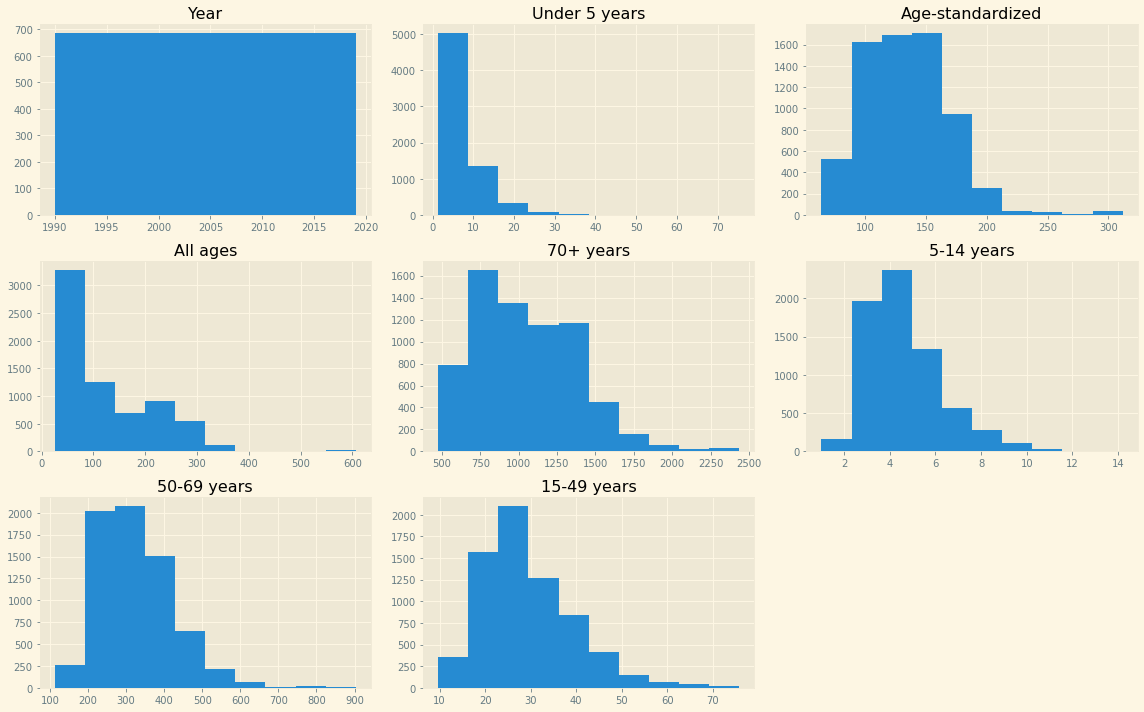

In [80]:
df_year.hist(bins=10, figsize=(16, 10))
plt.tight_layout()

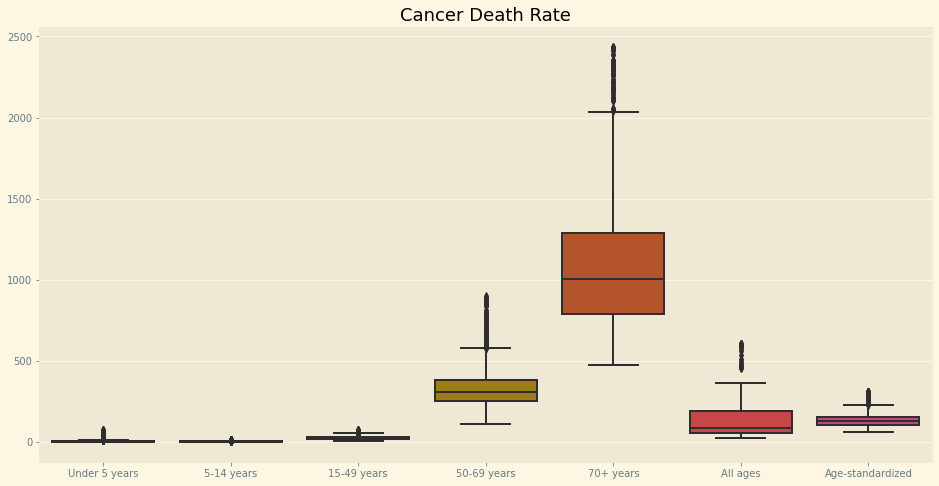

In [81]:
plt.figure(figsize=(16,8))
sns.boxplot(data=df_year.loc[:, ['Under 5 years', 
                                 '5-14 years', 
                                 '15-49 years', 
                                 '50-69 years', 
                                 '70+ years', 
                                 'All ages', 
                                 'Age-standardized']])
plt.title('Cancer Death Rate', size = 18)
plt.show()

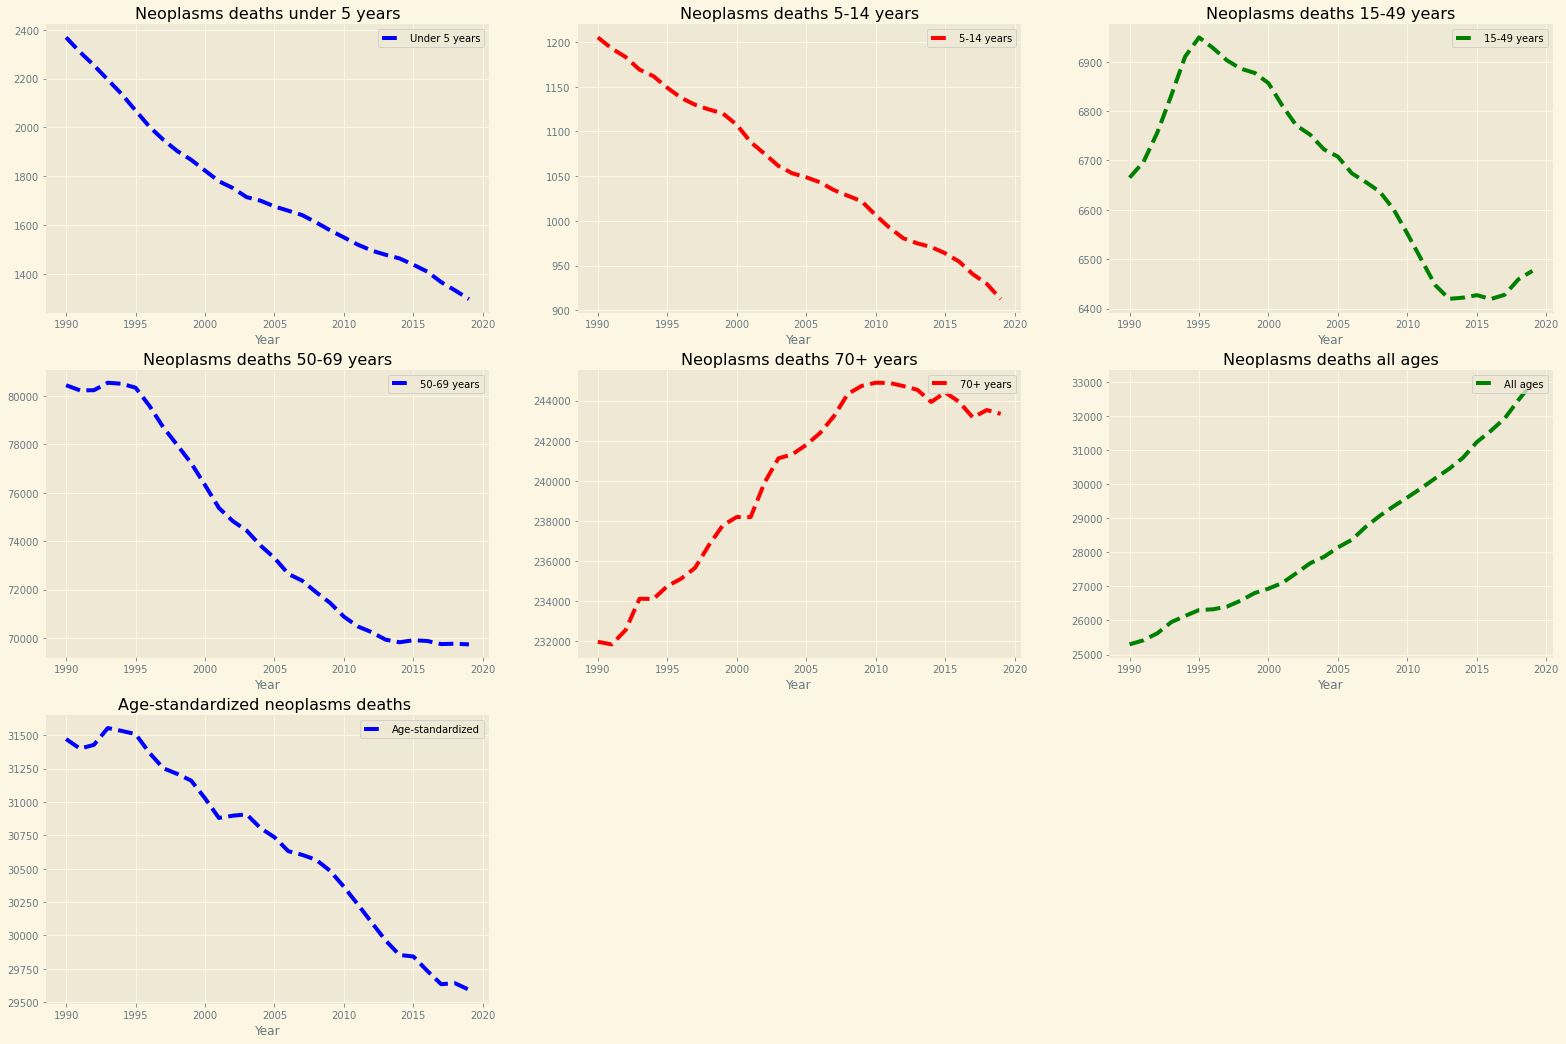

In [85]:
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(3,3,1)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms deaths under 5 years')
df_year.groupby('Year').sum()['Under 5 years'].plot(linewidth=4,color='blue', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,2)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms deaths 5-14 years')
df_year.groupby('Year').sum()['5-14 years'].plot(linewidth=4, color='red', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,3)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms deaths 15-49 years')
df_year.groupby('Year').sum()['15-49 years'].plot(linewidth=4, color = 'green', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,4)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms deaths 50-69 years')
df_year.groupby('Year').sum()['50-69 years'].plot(linewidth=4, color = 'blue', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,5)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms deaths 70+ years')
df_year.groupby('Year').sum()['70+ years'].plot(linewidth=4, color = 'red', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,6)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms deaths all ages')
df_year.groupby('Year').sum()['All ages'].plot(linewidth=4, color = 'green', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(3,3,7)
sub1.set_xlabel('Year')
sub1.set_title('Age-standardized neoplasms deaths ')
df_year.groupby('Year').sum()['Age-standardized'].plot(linewidth=4, color = 'blue', linestyle='dashed')
plt.legend(bbox_to_anchor=(1, 1), loc=1)
sns.despine()

In [86]:
Under_5_years = df_year.groupby('Entity').sum()['Under 5 years'].nlargest(10)
Under_5_years = pd.DataFrame(Under_5_years)
from_5_14_years = df_year.groupby('Entity').sum()['5-14 years'].nlargest(10)
from_5_14_years = pd.DataFrame(from_5_14_years)
from_15_49_years= df_year.groupby('Entity').sum()['15-49 years'].nlargest(10)
from_15_49_years = pd.DataFrame(from_15_49_years)
from_50_69_years = df_year.groupby('Entity').sum()['50-69 years'].nlargest(10)
from_50_69_years = pd.DataFrame(from_50_69_years)
plus_70_years = df_year.groupby('Entity').sum()['70+ years'].nlargest(10)
plus_70_years = pd.DataFrame(plus_70_years)
All_ages = df_year.groupby('Entity').sum()['All ages'].nlargest(10)
All_ages = pd.DataFrame(All_ages)
Age_standardized = df_year.groupby('Entity').sum()['Age-standardized'].nlargest(10)
Age_standardized = pd.DataFrame(Age_standardized)

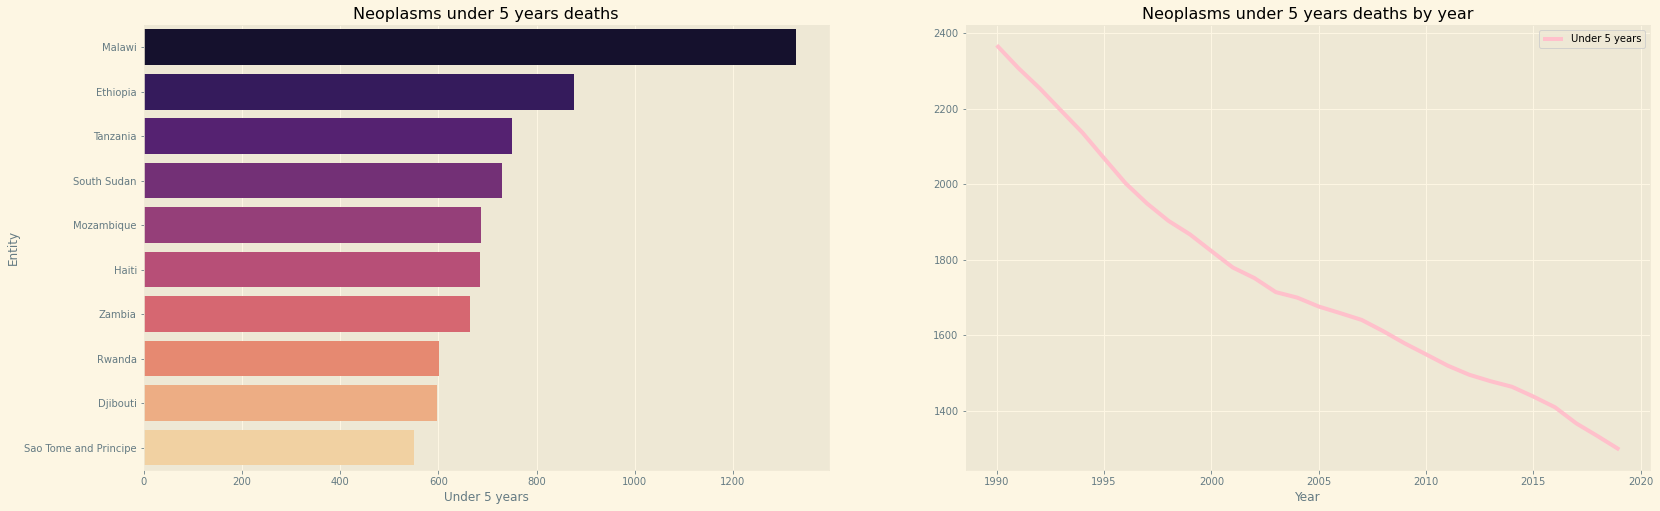

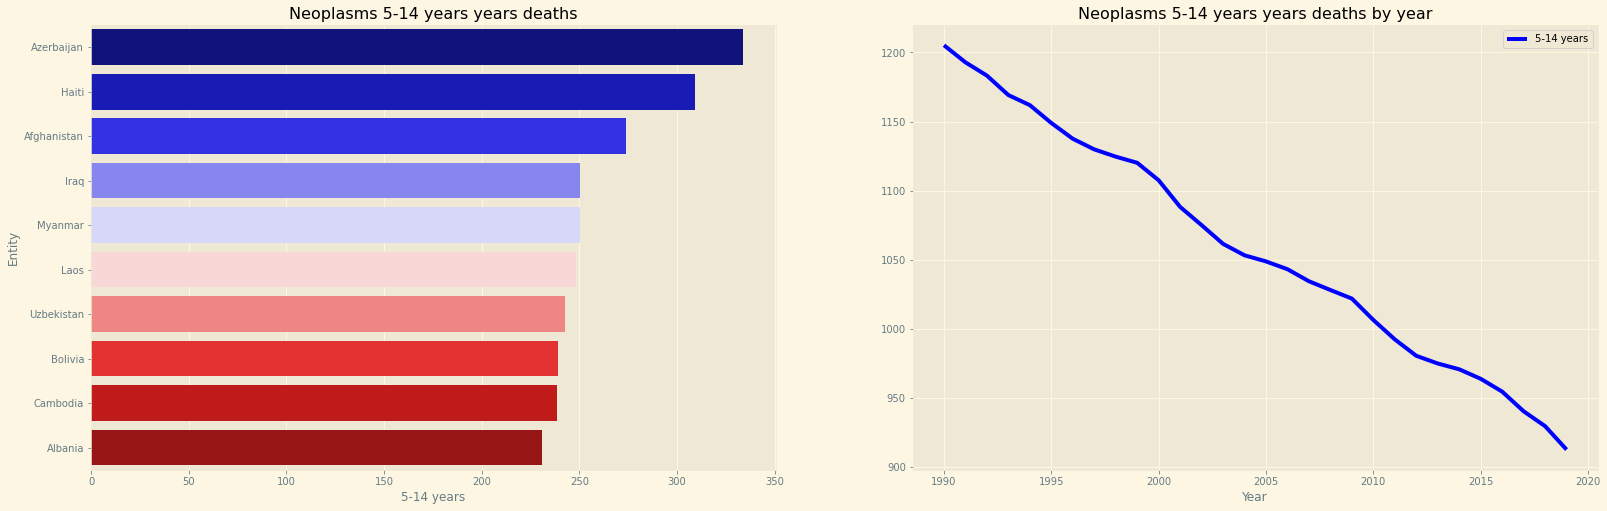

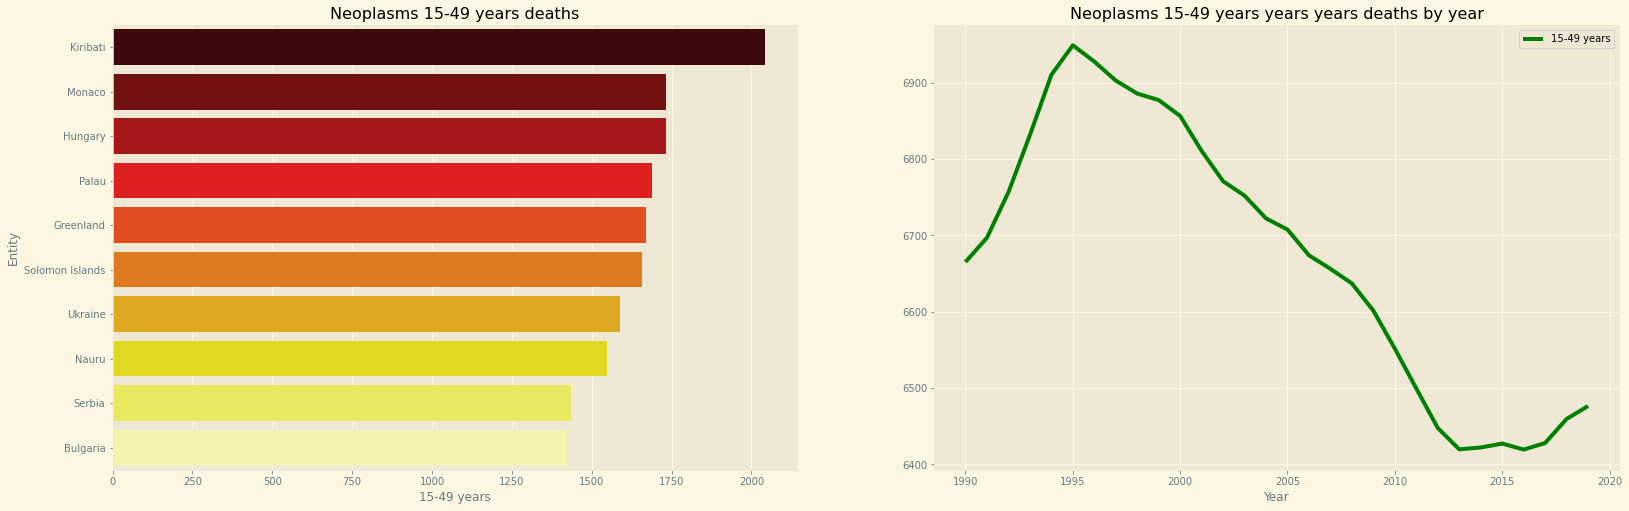

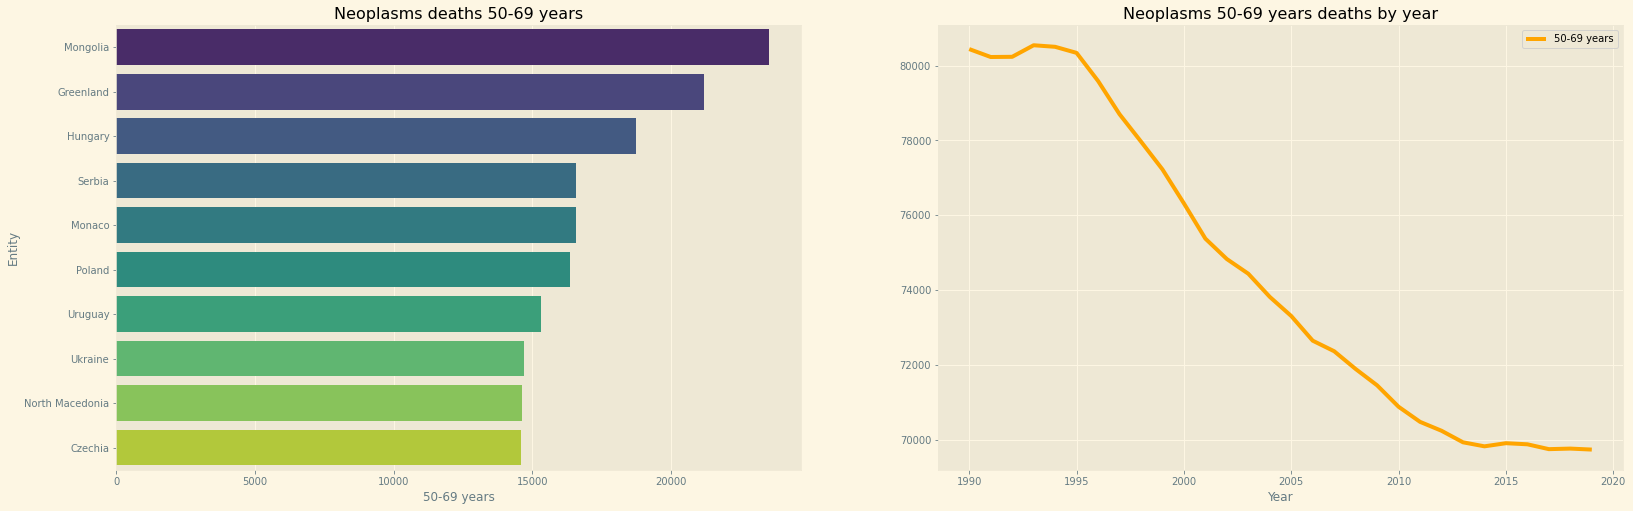

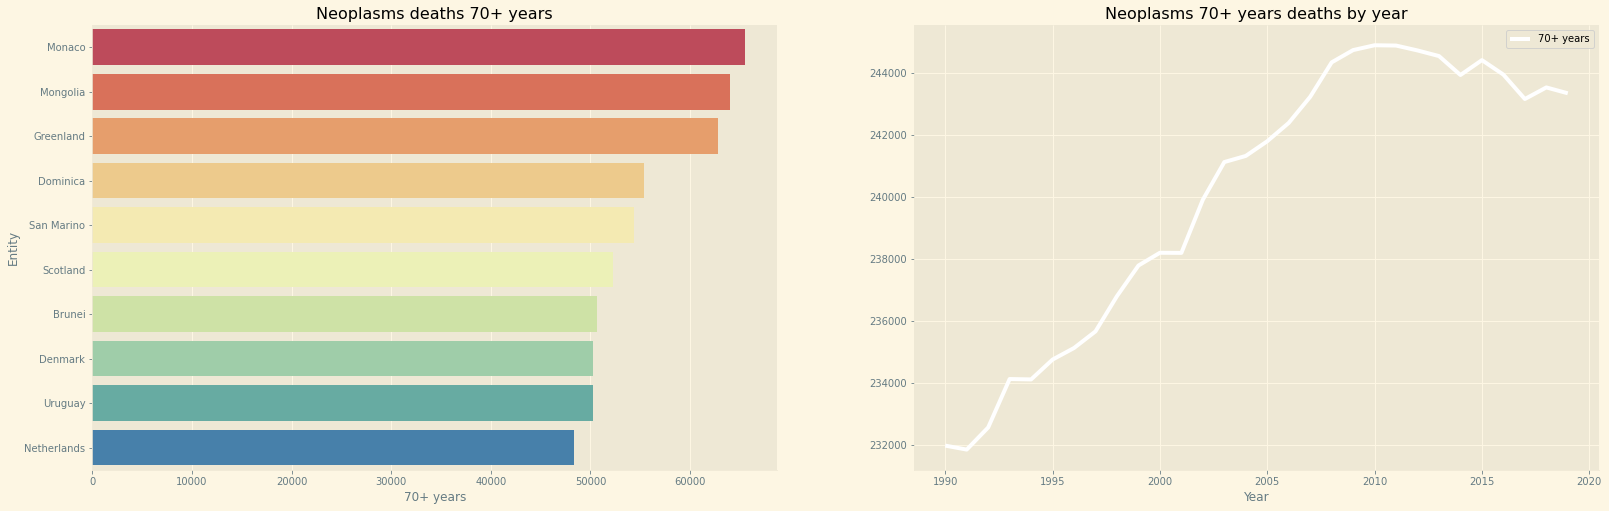

In [111]:
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('Under 5 years')
sub1.set_title('Neoplasms under 5 years deaths')
sns.barplot(x=Under_5_years['Under 5 years'],y=Under_5_years.index,data=Under_5_years,palette='magma')

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms under 5 years deaths by year')
df_year.groupby('Year').sum()['Under 5 years'].plot(linewidth=4, color = 'pink')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('5-14 years')
sub1.set_title('Neoplasms 5-14 years years deaths')
sns.barplot(x=from_5_14_years['5-14 years'],y=from_5_14_years.index,data=from_5_14_years,palette='seismic')

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms 5-14 years years deaths by year')
df_year.groupby('Year').sum()['5-14 years'].plot(linewidth=4, color = 'blue')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('15-49 years')
sub1.set_title('Neoplasms 15-49 years deaths')
sns.barplot(x=from_15_49_years['15-49 years'],y=from_15_49_years.index,data=from_15_49_years,palette='hot')

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms 15-49 years years years deaths by year')
df_year.groupby('Year').sum()['15-49 years'].plot(linewidth=4, color = 'green')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('50-69 years')
sub1.set_title('Neoplasms deaths 50-69 years')
sns.barplot(x=from_50_69_years['50-69 years'],y=from_50_69_years.index,data=from_50_69_years,palette='viridis')

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms 50-69 years deaths by year')
df_year.groupby('Year').sum()['50-69 years'].plot(linewidth=4, color = 'orange')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('70+ years')
sub1.set_title('Neoplasms deaths 70+ years')
sns.barplot(x=plus_70_years['70+ years'],y=plus_70_years.index,data=plus_70_years,palette='Spectral')

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms 70+ years deaths by year')
df_year.groupby('Year').sum()['70+ years'].plot(linewidth=4, color = 'white')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sns.despine()

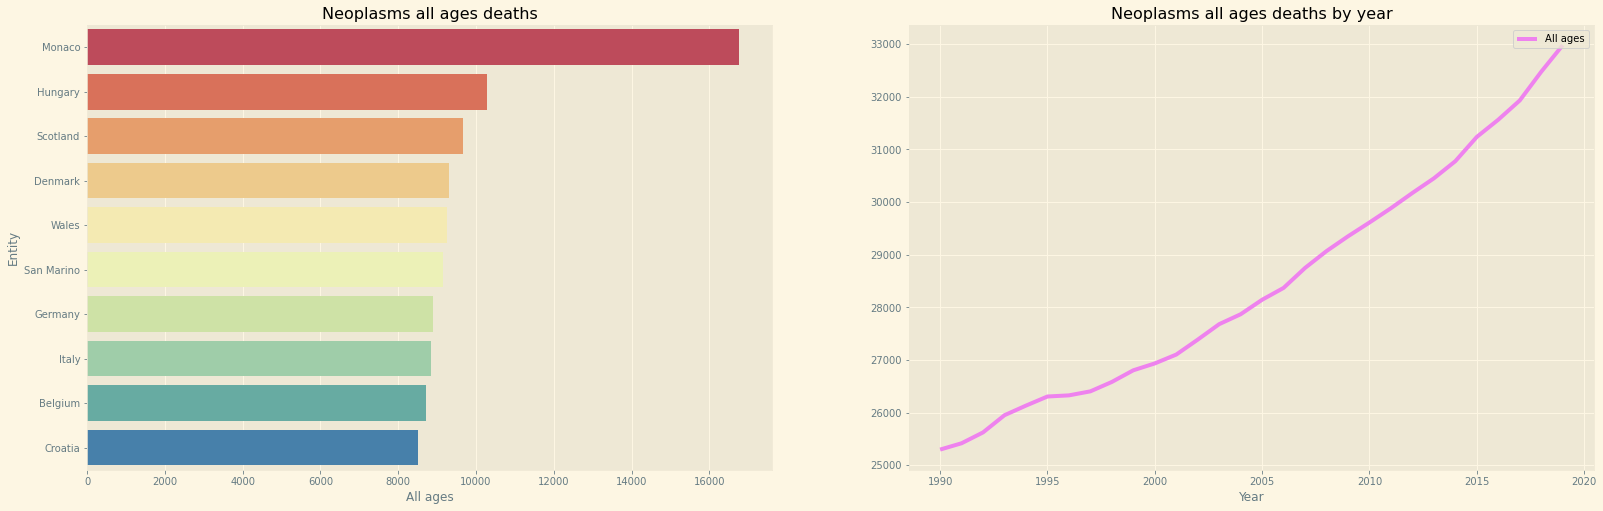

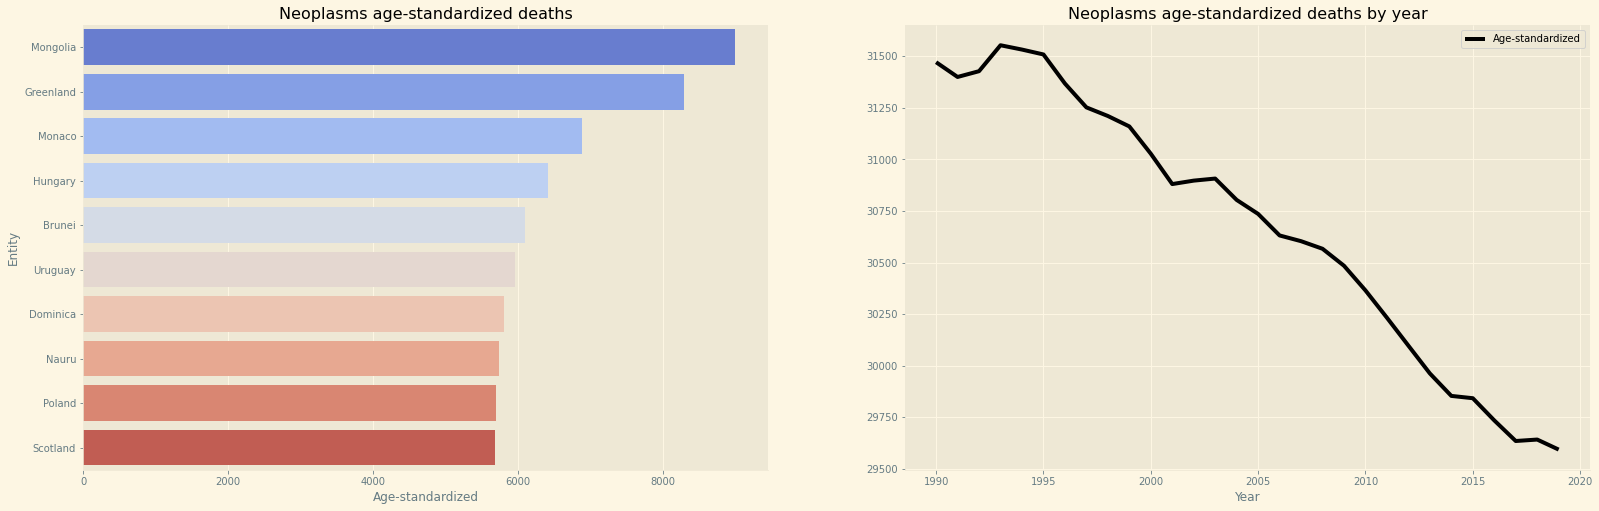

In [116]:
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('All ages')
sub1.set_title('Neoplasms all ages deaths')
sns.barplot(x=All_ages['All ages'],y=All_ages.index,data=All_ages,palette='Spectral')

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms all ages deaths by year')
df_year.groupby('Year').sum()['All ages'].plot(linewidth=4, color = 'violet')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('Age-standardized')
sub1.set_title('Neoplasms age-standardized deaths')
sns.barplot(x=Age_standardized['Age-standardized'],y=Age_standardized.index,data=Age_standardized,palette='coolwarm')

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms age-standardized deaths by year')
df_year.groupby('Year').sum()['Age-standardized'].plot(linewidth=4, color = 'black')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sns.despine()

# RUSSIA DEATH NEOPLASMS CAUSES

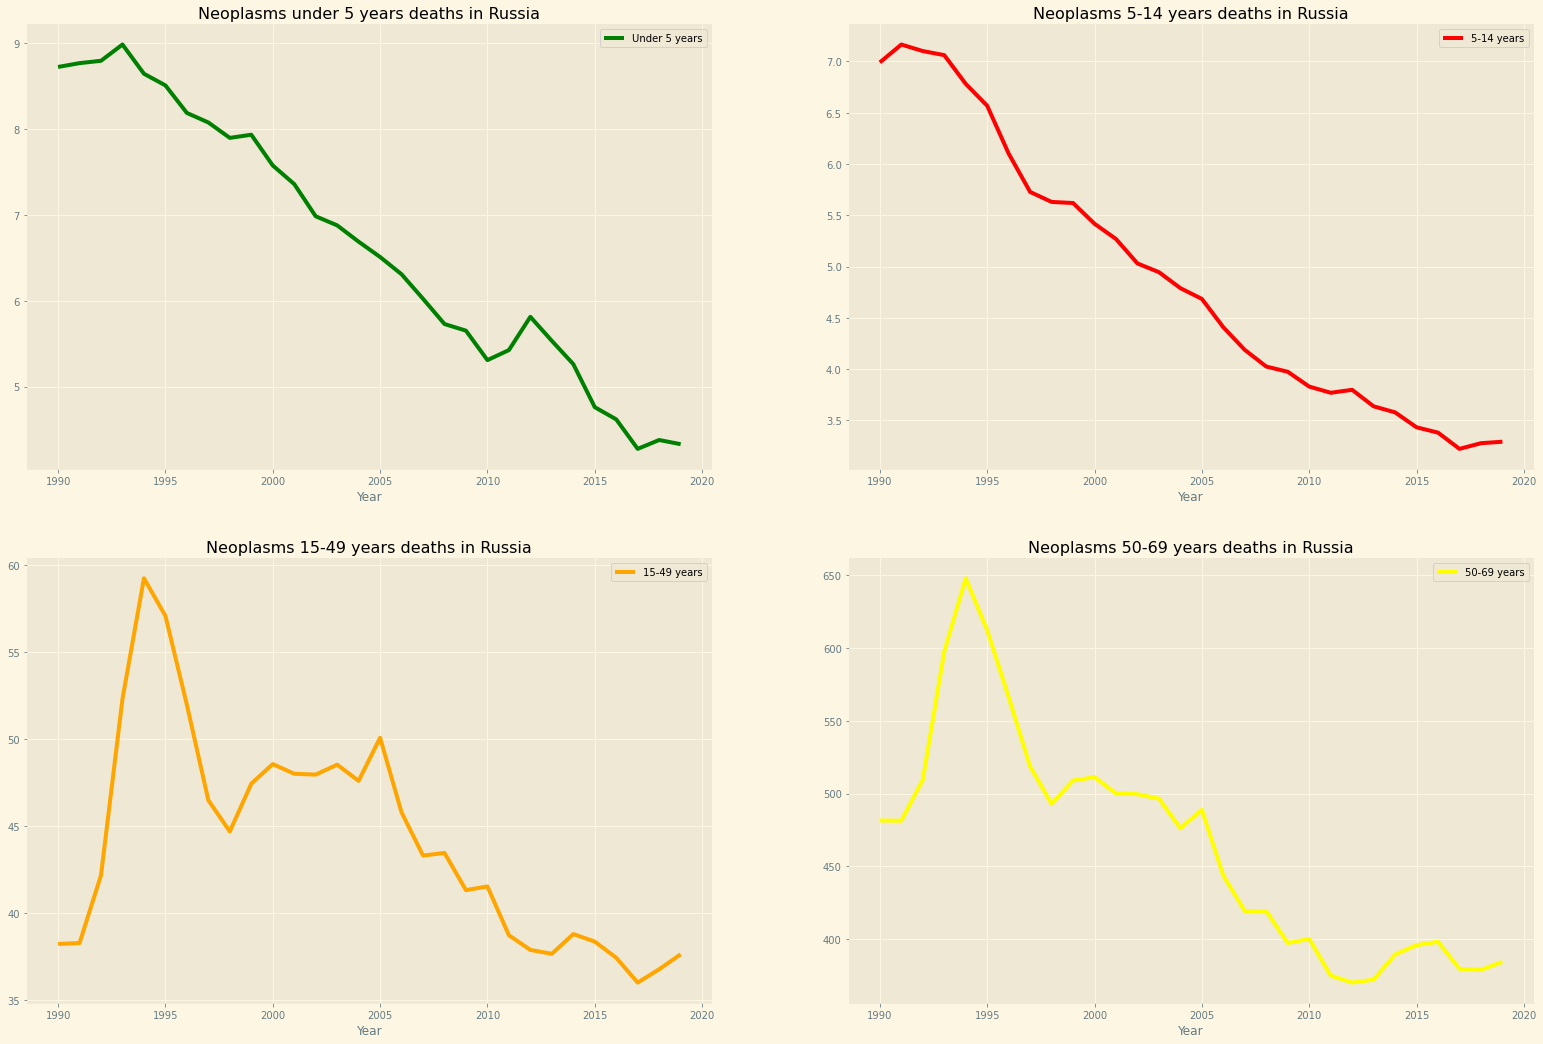

In [127]:
russia_ages = df_year.query(' Entity == "Russia" ')[['Entity', 
                                                     'Year',
                                                     'Under 5 years',
                                                     '5-14 years', 
                                                     '15-49 years', 
                                                     '50-69 years', 
                                                     '70+ years', 
                                                     'All ages', 
                                                     'Age-standardized']]

fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms under 5 years deaths in Russia')
russia_ages.groupby('Year').sum()['Under 5 years'].plot(linewidth=4,color='green')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms 5-14 years deaths in Russia')
russia_ages.groupby('Year').sum()['5-14 years'].plot(linewidth=4, color='red')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(2,2,3)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms 15-49 years deaths in Russia')
russia_ages.groupby('Year').sum()['15-49 years'].plot(linewidth=4, color = 'orange')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(2,2,4)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms 50-69 years deaths in Russia')
russia_ages.groupby('Year').sum()['50-69 years'].plot(linewidth=4, color = 'yellow')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sns.despine()

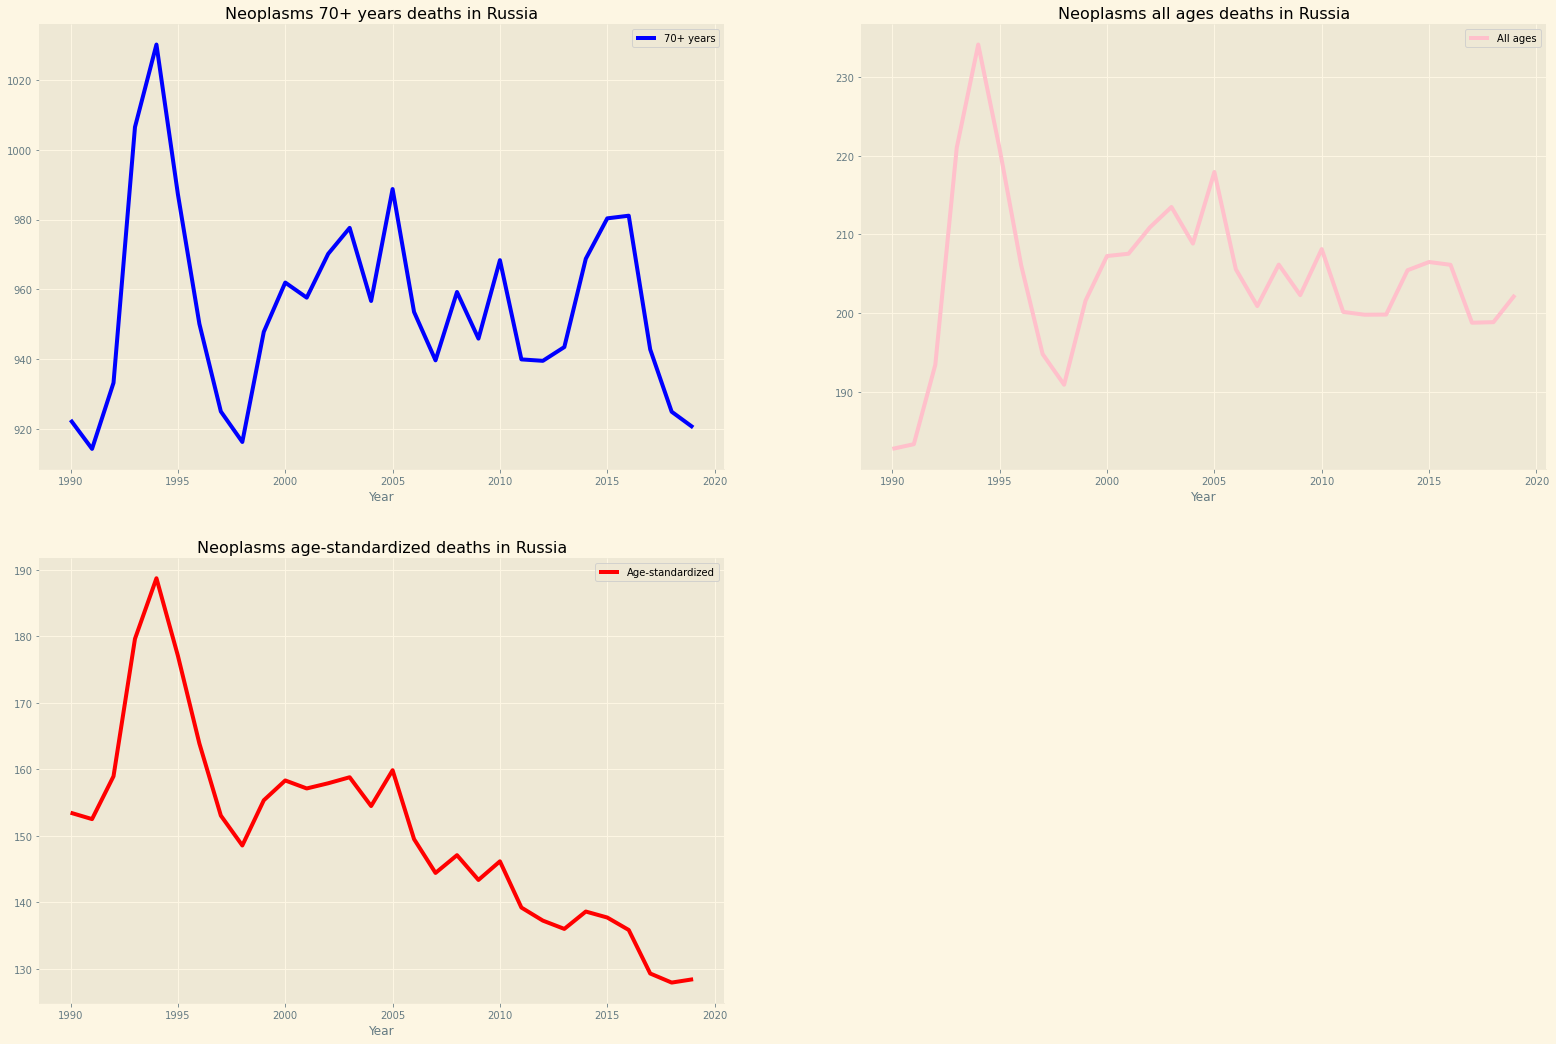

In [128]:
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(2,2,1)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms 70+ years deaths in Russia')
russia_ages.groupby('Year').sum()['70+ years'].plot(linewidth=4, color = 'blue')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(2,2,2)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms all ages deaths in Russia')
russia_ages.groupby('Year').sum()['All ages'].plot(linewidth=4, color = 'pink')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sub1 = fig.add_subplot(2,2,3)
sub1.set_xlabel('Year')
sub1.set_title('Neoplasms age-standardized deaths in Russia')
russia_ages.groupby('Year').sum()['Age-standardized'].plot(linewidth=4, color = 'red')
plt.legend(bbox_to_anchor=(1, 1), loc=1)

sns.despine()